# Evaluating Fuzzers

In [6]:
install.packages("renv")
library(renv)
renv::init()


install.packages("xtable")
install.packages("generalhoslem")
install.packages("lmboot")
install.packages("dplyr")
install.packages("tidyr", version="1.1.3")
install.packages("ggfortify")
install.packages("ggplot2")
install.packages("MASS")
install.packages("effsize")
install.packages("MatrixModels")
install.packages("quantreg")
install.packages("scales")
install.packages("caret", dependencies=TRUE)
install.packages("glmnet")

renv::snapshot()




The following package(s) will be installed:
- renv [1.0.3]
These packages will be installed into "~/git/seeded-fuzzbench/final-data-analysis/renv/library/R-4.1/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing renv ...                           OK [linked from cache]
- The project is out-of-sync -- use `renv::status()` for details.
The following package(s) will be installed:
- xtable [1.8-4]
These packages will be installed into "~/git/seeded-fuzzbench/final-data-analysis/renv/library/R-4.1/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing xtable ...                         OK [linked from cache]
The following package(s) will be installed:
- generalhoslem [1.3.4]
These packages will be installed into "~/git/seeded-fuzzbench/final-data-analysis/renv/library/R-4.1/x86_64-pc-linux-gnu".

# Installing packages ----------------------------------------------------

Installing package into ‘/home/wolffd/git/seeded-fuzzbench/final-data-analysis/renv/library/R-4.1/x86_64-pc-linux-gnu’
(as ‘lib’ is unspecified)



The following package(s) will be installed:
- ggfortify [0.4.16]
These packages will be installed into "~/git/seeded-fuzzbench/final-data-analysis/renv/library/R-4.1/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing ggfortify ...                      OK [linked from cache]
The following package(s) will be installed:
- ggplot2 [3.4.3]
These packages will be installed into "~/git/seeded-fuzzbench/final-data-analysis/renv/library/R-4.1/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing ggplot2 ...                        OK [linked from cache]
The following package(s) will be installed:
- MASS [7.3-60]
These packages will be installed into "~/git/seeded-fuzzbench/final-data-analysis/renv/library/R-4.1/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing MASS ...                           OK [linked fro

Installing package into ‘/home/wolffd/git/seeded-fuzzbench/final-data-analysis/renv/library/R-4.1/x86_64-pc-linux-gnu’
(as ‘lib’ is unspecified)



The following package(s) will be installed:
- glmnet [4.1-8]
These packages will be installed into "~/git/seeded-fuzzbench/final-data-analysis/renv/library/R-4.1/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing glmnet ...                         OK [linked from cache]
The following package(s) will be updated in the lockfile:

# CRAN -----------------------------------------------------------------------
- base64enc       [* -> 0.1-3]
- boot            [* -> 1.3-28.1]
- caret           [* -> 6.0-94]
- class           [* -> 7.3-22]
- cli             [* -> 3.6.1]
- clock           [* -> 0.7.0]
- codetools       [* -> 0.2-19]
- colorspace      [* -> 2.1-0]
- cpp11           [* -> 0.4.6]
- crayon          [* -> 1.5.2]
- data.table      [* -> 1.14.8]
- diagram         [* -> 1.6.5]
- digest          [* -> 0.6.33]
- dplyr           [* -> 1.1.3]
- e1071           [* -> 1.7-13]
- effsize         [* -> 0.8.1]
- ellipsis        [* -

In [2]:
renv::restore()

library(xtable)
library(boot)
library(lmboot)
library(tidyr)
library(dplyr)
library(ggplot2)

- The library is already synchronized with the lockfile.



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:


theme_set(theme_bw())

recode_properties = function(property){
  return(recode_factor(property, 
    corpus_size="#Seeds",
    initial_coverage = "Initial Coverage",
    mean_exec_ns = "Mean Exec Time",
    mean_size_bytes = "Mean Seed Size",
    bin_text_size = "Program Size",
    total_eq = "%Equalities",
    total_ineq = "%Inqualities",
    total_shared = "%Shared Libraries"
  ))
}


In [5]:
d = read.csv("e2-comb-data.csv")
print("Benchmarks:")
unique(d$benchmark)
print("Fuzzers")
unique(d$fuzzer)
print("Max Time")
head(d)

[1] "Benchmarks:"


[1] "harfbuzz-1.3.2"              "lcms-2017-03-21"            
 [3] "libjpeg-turbo-07-2017"       "libpcap_fuzz_both"          
 [5] "libpng-1.2.56"               "libxslt_xpath"              
 [7] "mbedtls_fuzz_dtlsclient"     "vorbis-2017-12-11"          
 [9] "woff2-2016-05-06"            "zlib_zlib_uncompress_fuzzer"
[11] "bloaty_fuzz_target"          "freetype2-2017"             
[13] "sqlite3_ossfuzz"

[1] "Fuzzers"


[1] "afl"         "libfuzzer"   "aflplusplus" "entropic"    "honggfuzz"

[1] "Max Time"


,X,trial_id,benchmark,fuzzer,Unnamed..0_x,Unnamed..0.1,git_hash,experiment_filestore,experiment,time_started,⋯,q25_exec_ns,q50_exec_ns,q75_exec_ns,q100_exec_ns,mean_size_bytes,q25_mean_size_bytes,q50_mean_size_bytes,q75_mean_size_bytes,q100_mean_size_bytes,corpus_size
,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,121,harfbuzz-1.3.2,afl,44874,11461,88981af167e37e5eabcd4fc7ab71d60d3550c673,/home/ec2-user/scratch/experiment-data,e2v2harf,2022-08-06 09:02:01.864991,⋯,3058789,3169810,3304375,3853513,15990.03125,68.25,88.5,707.00,393268,32
2,1,121,lcms-2017-03-21,afl,10557,140,88981af167e37e5eabcd4fc7ab71d60d3550c673,/home/ec2-user/scratch/experiment-data,e2v2lcms,2022-08-06 08:42:36.563193,⋯,2978472,3276692,4033286,4564968,191.87500,144.00,144.0,154.25,820,16
3,2,121,libjpeg-turbo-07-2017,afl,100572,10635,88981af167e37e5eabcd4fc7ab71d60d3550c673,/home/ec2-user/scratch/experiment-data,e2v2libjpeg,2022-08-06 09:07:35.204098,⋯,2624587,2736213,3281105,12872743,55.20000,6.75,21.5,107.50,149,20
4,3,121,libpcap_fuzz_both,afl,56419,11555,88981af167e37e5eabcd4fc7ab71d60d3550c673,/home/ec2-user/scratch/experiment-data,e2v2pcap,2022-08-06 09:03:12.262914,⋯,3062999,3294096,5826739,10448585,41.30435,31.00,37.5,43.00,106,46
5,4,121,libpng-1.2.56,afl,78666,11300,88981af167e37e5eabcd4fc7ab71d60d3550c673,/home/ec2-user/scratch/experiment-data,e2v2libpng,2022-08-06 09:08:09.675672,⋯,2557242,2602990,2705117,4008061,816.00000,16.00,41.0,47.00,19513,36
6,5,121,libxslt_xpath,afl,10892,11477,88981af167e37e5eabcd4fc7ab71d60d3550c673,/home/ec2-user/scratch/experiment-data,e2v2xslt,2022-08-06 09:03:32.063555,⋯,2836390,2979958,3113631,2099863158,3660.50360,16.00,26.0,41.00,443972,139


In [6]:
dl = read.csv("e2-comb-data.csv")
dl = dl %>% dplyr::rename(max_size_bytes = q100_mean_size_bytes, max_exec_ns = q100_exec_ns)


colnames(dl)
unique(dl$fuzzer)
unique(dl$benchmark)



print("Any bugs?")
# dl %>% filter(bugs_covered > 0)

dl = dl %>% select(-bugs_covered)

print("Time")
summary(dl$time)

# We notice that not there are not all trials available for the 84600 time stamp
t  = dl %>% filter(time == 86400) %>% group_by(benchmark,fuzzer) %>% summarize(n=n())
head(t)
print("Mean number of trials.")
mean(t$n)

# So we remove honggfuzz
t = t %>% filter(fuzzer != "honggfuzz")
print("Mean number of trials after removing honggfuzz.")
mean(t$n)

dl = dl %>% filter(time == 86400 & fuzzer != "honggfuzz") %>% select(-time)

[1] "X"                    "trial_id"             "benchmark"           
 [4] "fuzzer"               "Unnamed..0_x"         "Unnamed..0.1"        
 [7] "git_hash"             "experiment_filestore" "experiment"          
[10] "time_started"         "time_ended"           "time"                
[13] "edges_covered"        "fuzzer_stats"         "crash_key"           
[16] "bugs_covered"         "edges_covered_max"    "saturated"           
[19] "time_sat"             "initial_coverage"     "corpus"              
[22] "fuzzbench_trial_id"   "per_target_trial"     "Unnamed..0_y"        
[25] "total_shared"         "total_eq"             "total_ineq"          
[28] "total_indir"          "bin_text_size"        "eq_unexplored"       
[31] "eq_reached"           "ineq_unexplored"      "ineq_reached"        
[34] "indir_reached"        "shared_reached"       "mean_exec_ns"        
[37] "q25_exec_ns"          "q50_exec_ns"          "q75_exec_ns"         
[40] "max_exec_ns"          "mean_size_bytes"      "q25_mean_size_bytes" 
[43] "q50_mean_size_bytes"  "q75_mean_size_bytes"  "max_size_bytes"      
[46] "corpus_size"

[1] "afl"         "libfuzzer"   "aflplusplus" "entropic"    "honggfuzz"

[1] "harfbuzz-1.3.2"              "lcms-2017-03-21"            
 [3] "libjpeg-turbo-07-2017"       "libpcap_fuzz_both"          
 [5] "libpng-1.2.56"               "libxslt_xpath"              
 [7] "mbedtls_fuzz_dtlsclient"     "vorbis-2017-12-11"          
 [9] "woff2-2016-05-06"            "zlib_zlib_uncompress_fuzzer"
[11] "bloaty_fuzz_target"          "freetype2-2017"             
[13] "sqlite3_ossfuzz"

[1] "Any bugs?"
[1] "Time"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    900   86400   86400   70349   86400   86400 

`summarise()` has grouped output by 'benchmark'. You can override using the `.groups` argument.


benchmark,fuzzer,n
<chr>,<chr>,<int>
freetype2-2017,afl,24
freetype2-2017,aflplusplus,24
freetype2-2017,entropic,24
freetype2-2017,honggfuzz,15
freetype2-2017,libfuzzer,24
harfbuzz-1.3.2,afl,24


[1] "Mean number of trials."


[1] 22.58182

[1] "Mean number of trials after removing honggfuzz."


[1] 24

In [9]:
# Grouping the data by properties
longer = dl %>% 
  select(per_target_trial, benchmark, fuzzer, edges_covered, initial_coverage, total_shared, total_eq, total_ineq, bin_text_size, mean_exec_ns, mean_size_bytes, corpus_size
  #, q25_exec_ns, q25_mean_size_bytes, q50_exec_ns, q50_mean_size_bytes, q75_exec_ns, q75_mean_size_bytes, max_exec_ns, max_size_bytes
  ) %>%
  mutate(coverage_increase = edges_covered - initial_coverage) %>%
  mutate(total_shared = total_shared / bin_text_size, total_eq = total_eq / bin_text_size, total_ineq = total_ineq / bin_text_size) %>%
  pivot_longer(c("total_shared", "total_eq", "total_ineq", "bin_text_size"), values_to="v_program", names_to="n_program") %>%
  pivot_longer(c("initial_coverage", "mean_exec_ns", "mean_size_bytes", "corpus_size"
                 #, "q25_exec_ns", "q25_mean_size_bytes", "q50_exec_ns", "q50_mean_size_bytes", "q75_exec_ns", "q75_mean_size_bytes", "max_exec_ns", "max_size_bytes"
                ), values_to="v_corpus", names_to="n_corpus")

program = longer %>% select(-n_corpus, -v_corpus) %>% dplyr::rename(property=n_program, value=v_program)
program$group = "program"
corpus = longer %>% select(-n_program, -v_program) %>% dplyr::rename(property=n_corpus, value=v_corpus)
corpus$group = "corpus"

longer = unique(rbind(corpus, program))
head(longer)

per_target_trial,benchmark,fuzzer,edges_covered,coverage_increase,property,value,group
<dbl>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<chr>
0,harfbuzz-1.3.2,afl,6636,2395,initial_coverage,4241.00,corpus
0,harfbuzz-1.3.2,afl,6636,2395,mean_exec_ns,3169912.37,corpus
0,harfbuzz-1.3.2,afl,6636,2395,mean_size_bytes,15990.03,corpus
0,harfbuzz-1.3.2,afl,6636,2395,corpus_size,32.00,corpus
0,libjpeg-turbo-07-2017,afl,2024,637,initial_coverage,1387.00,corpus
0,libjpeg-turbo-07-2017,afl,2024,637,mean_exec_ns,3716715.85,corpus


In [11]:
#dlm = longer %>% group_by(benchmark, fuzzer, group, property, value) %>% summarize_all(list(mean)) %>% select(-trial_id)
# Add fuzzer ranks
dlm = longer %>% group_by(benchmark, group, property, per_target_trial) %>% mutate(fuzzer_rank = rank(-edges_covered, ties.method = "average"))

dlm_corpus = dlm %>% filter(group=="corpus")  %>% group_by(benchmark, group, property,fuzzer) %>% mutate(n=n(),value_rank = rank(value, ties.method = "average"))
dlm_program = dlm %>% filter(group=="program")  %>% group_by(per_target_trial, group, property,fuzzer) %>% mutate(n=n(),value_rank = rank(value, ties.method = "average"))
head(dlm)

per_target_trial,benchmark,fuzzer,edges_covered,coverage_increase,property,value,group,fuzzer_rank
<dbl>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<dbl>
0,harfbuzz-1.3.2,afl,6636,2395,initial_coverage,4241.00,corpus,4
0,harfbuzz-1.3.2,afl,6636,2395,mean_exec_ns,3169912.37,corpus,4
0,harfbuzz-1.3.2,afl,6636,2395,mean_size_bytes,15990.03,corpus,4
0,harfbuzz-1.3.2,afl,6636,2395,corpus_size,32.00,corpus,4
0,libjpeg-turbo-07-2017,afl,2024,637,initial_coverage,1387.00,corpus,3
0,libjpeg-turbo-07-2017,afl,2024,637,mean_exec_ns,3716715.85,corpus,3


In [14]:
length(unique(dlm_corpus$benchmark))

[1] 11

In [8]:
t = rbind(dlm_corpus, dlm_program) %>% 
  group_by(fuzzer, group, property, value_rank) %>% 
  summarize(fuzzer_rank = mean(fuzzer_rank)) %>%
  group_by(fuzzer, group, property) %>%
  summarize(
    p_value = (summary(lm(fuzzer_rank ~ value_rank))$coefficients[2,4]),
    intercept = summary(lm(fuzzer_rank ~ value_rank))$coefficients[1,1],
    slope = summary(lm(fuzzer_rank ~ value_rank))$coefficients[2,1],
    r_squared = summary(lm(fuzzer_rank ~ value_rank))$r.squared

  ) %>% filter(property != "total_indir")
t

mean(t$r_squared)
t %>% group_by(group, property) %>% summarize(r_squared = mean(r_squared))

`summarise()` has grouped output by 'fuzzer', 'group', 'property'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'fuzzer', 'group'. You can override using the `.groups` argument.


fuzzer,group,property,p_value,intercept,slope,r_squared
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
afl,corpus,corpus_size,0.44727141,3.580599,-0.006784483,0.0152819217
afl,corpus,initial_coverage,0.02432431,3.584157,-0.012035573,0.2099871193
afl,corpus,mean_exec_ns,0.51557483,3.470520,-0.002944664,0.0194641748
afl,corpus,mean_size_bytes,0.13580336,3.513011,-0.006343874,0.0982645252
afl,program,bin_text_size,0.17356067,3.751894,-0.053030303,0.1952872017
afl,program,total_eq,0.43315096,3.247348,0.031060606,0.0695886158
afl,program,total_ineq,0.92768028,3.412121,0.003598485,0.0009670506
afl,program,total_shared,0.46469150,3.264394,0.028219697,0.0608346578
aflplusplus,corpus,corpus_size,0.83514865,1.468336,0.001855733,0.0011540775


[1] 0.0945207

`summarise()` has grouped output by 'group'. You can override using the `.groups` argument.


group,property,r_squared
<chr>,<chr>,<dbl>
corpus,corpus_size,0.0084078416
corpus,initial_coverage,0.1557705829
corpus,mean_exec_ns,0.1109708337
corpus,mean_size_bytes,0.0822483642
program,bin_text_size,0.3106514997
program,total_eq,0.0304340658
program,total_ineq,0.0007554817
program,total_shared,0.0569269399


In [9]:
library(stringr)
table = ""
for (Group in unique(t$group)) {
  table = paste0(table, " & \\multicolumn{4}{c}{\\emph{", str_to_title(Group), "}}")
}
table = paste0(table, "\\\\\n")
for (Group in unique(t$group)) {
  for (Property in unique(subset(t, group == Group)$property)){
    table = paste0(table, " & \\emph{", gsub("#", "\\\\#", recode_properties(Property)), "}")
  }
}
table = paste0(table, "\\\\\\hline\n")

for (Fuzzer in unique(t$fuzzer)) {
  table = paste0(table, "\\emph{", gsub("Afl", "AFL", gsub("plus", "+", str_to_title(Fuzzer))), "} & ")
  for (Group in unique(t$group)) {
    for (Property in unique(subset(t, group == Group)$property)) {
      s = t %>% filter(fuzzer == Fuzzer, property == Property)
      table = paste0(table,
                      ifelse(s$p_value < 0.05, "\\textbf{",""),
                      #"\\texttt{",
                      ifelse(s$slope < 0, "\\textcolor{darkgreen}{","\\textcolor{darkred}{"),
                      format(round(s$intercept, 1), nsmall = 1),
                      ifelse(s$slope < 0, " - ", " + "),
                      format(round(abs(s$slope), 3), nsmall = 3),
                      "x",
                      #"x (",
                      #format(round(s$p_value, 2), nsmall = 2),
                      #")",
                      ifelse(s$p_value < 0.05, "}", ""),
                      #"}",
                      "}",
                      " &")
    }
  }
  table = substr(table, 1, nchar(table) - 2)
  table = paste0(table, "\\\\\n")
}
table = substr(table, 1, nchar(table) - 3)

cat(table, file=paste0("~/Downloads/linear.regression.tex"))
cat(table)

 & \multicolumn{4}{c}{\emph{Corpus}} & \multicolumn{4}{c}{\emph{Program}}\\
 & \emph{\#Seeds} & \emph{Initial Coverage} & \emph{Mean Exec Time} & \emph{Mean Seed Size} & \emph{Program Size} & \emph{%Equalities} & \emph{%Inqualities} & \emph{%Shared Libraries}\\\hline
\emph{AFL} & \textcolor{darkgreen}{3.6 - 0.007x} &\textbf{\textcolor{darkgreen}{3.6 - 0.012x}} &\textcolor{darkgreen}{3.5 - 0.003x} &\textcolor{darkgreen}{3.5 - 0.006x} &\textcolor{darkgreen}{3.8 - 0.053x} &\textcolor{darkred}{3.2 + 0.031x} &\textcolor{darkred}{3.4 + 0.004x} &\textcolor{darkred}{3.3 + 0.028x}\\
\emph{AFL++} & \textcolor{darkred}{1.5 + 0.002x} &\textcolor{darkgreen}{1.5 - 0.006x} &\textbf{\textcolor{darkgreen}{1.6 - 0.014x}} &\textcolor{darkgreen}{1.5 - 0.007x} &\textbf{\textcolor{darkgreen}{2.0 - 0.097x}} &\textcolor{darkred}{1.4 + 0.010x} &\textcolor{darkgreen}{1.5 - 0.006x} &\textcolor{darkred}{1.3 + 0.033x}\\
\emph{Entropic} & \textcolor{darkgreen}{1.9 - 0.003x} &\textcolor{darkgreen}{1.9 - 0.005x} &\te

`summarise()` has grouped output by 'fuzzer', 'property'. You can override using the `.groups` argument.
`geom_smooth()` using formula = 'y ~ x'
Saving 4.8 x 5.33 in image
`geom_smooth()` using formula = 'y ~ x'


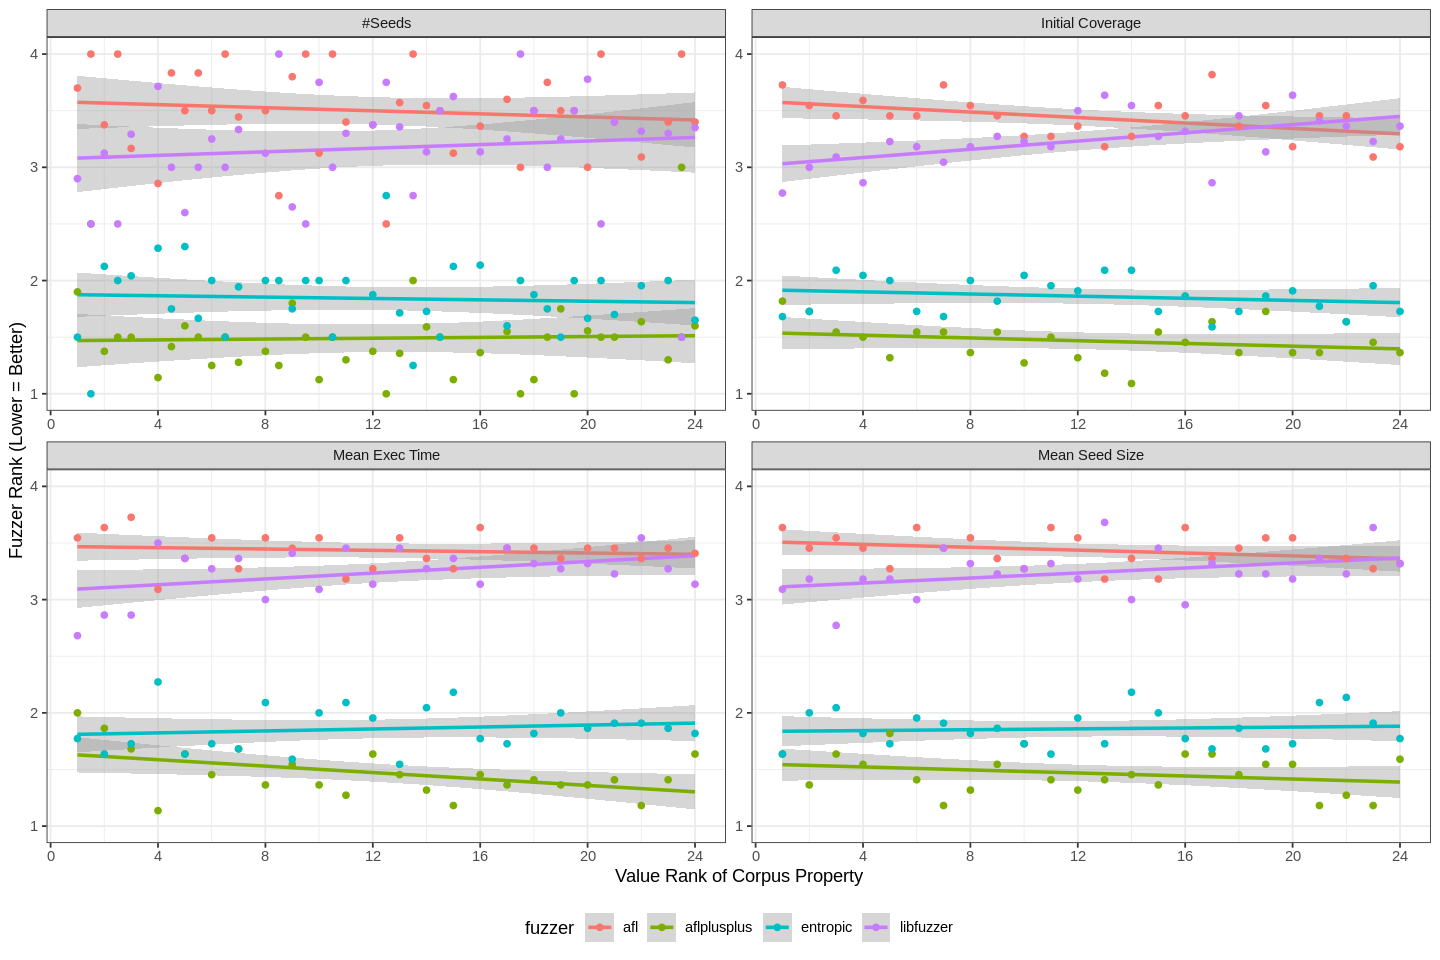

In [10]:
options(repr.plot.width=12, repr.plot.height=8)

ggplot(subset(dlm_corpus, TRUE) %>% group_by(fuzzer, property,value_rank) %>% summarize(fuzzer_rank = mean(fuzzer_rank)) %>% mutate(property = recode_properties(property)), aes(value_rank, fuzzer_rank)) +
  geom_smooth(aes(color=fuzzer), method = "lm") +
  geom_point(aes(color=fuzzer)) +
  xlab("Value Rank of Corpus Property") +
  ylab("Fuzzer Rank (Lower = Better)") +
  scale_x_continuous(breaks=seq(0,24,4)) +
  ylim(1,4) +
  facet_wrap(. ~ property, scales="free",ncol=2) +
  theme(legend.position="bottom")

ggsave("~/Downloads/corpus.rank.pdf",scale=0.8,width=6)

`summarise()` has grouped output by 'fuzzer', 'property'. You can override using the `.groups` argument.
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 16 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 12 rows containing missing values (`geom_point()`).”
Saving 5.33 x 5.33 in image
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 16 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 12 rows containing missing values (`geom_point()`).”


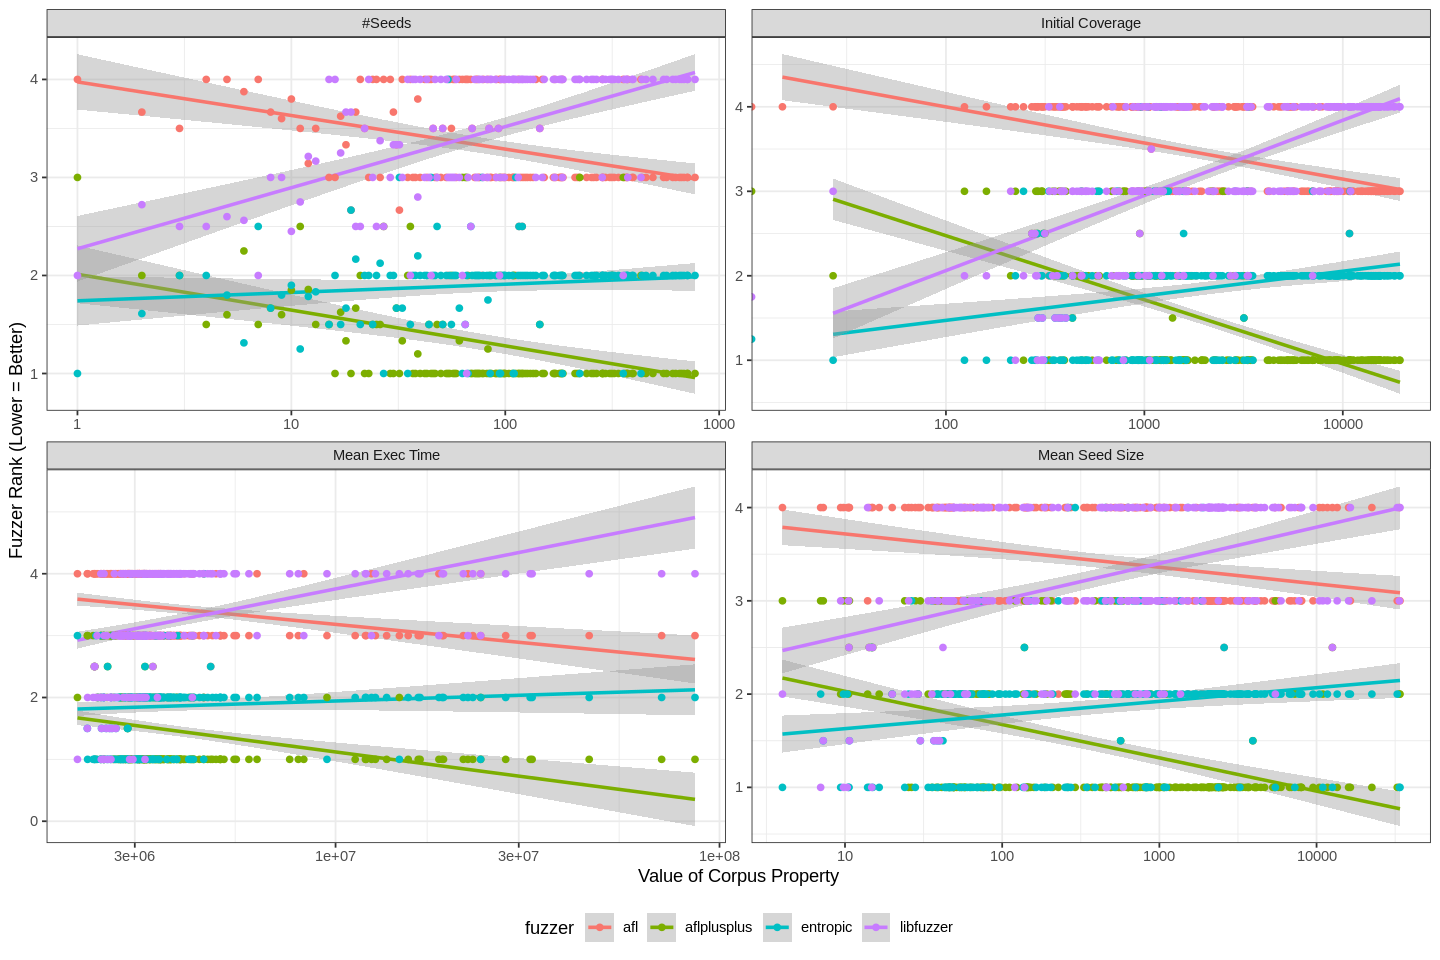

In [11]:
ggplot(subset(dlm_corpus, TRUE) %>% group_by(fuzzer, property,value) %>% summarize(fuzzer_rank = mean(fuzzer_rank)) %>% mutate(property = recode_properties(property)), aes(value, fuzzer_rank)) +
  geom_smooth(aes(color=fuzzer),method = "lm") +
  geom_point(aes(color=fuzzer)) +
  xlab("Value of Corpus Property") +
  ylab("Fuzzer Rank (Lower = Better)") +
  scale_x_log10() +
  facet_wrap(. ~ property, scales="free",ncol=2) +
  theme(legend.position="bottom")
ggsave("~/Downloads/corpus.value.pdf",scale=0.8)

`summarise()` has grouped output by 'fuzzer', 'property'. You can override using the `.groups` argument.
`geom_smooth()` using formula = 'y ~ x'
Saving 4.8 x 5.33 in image
`geom_smooth()` using formula = 'y ~ x'


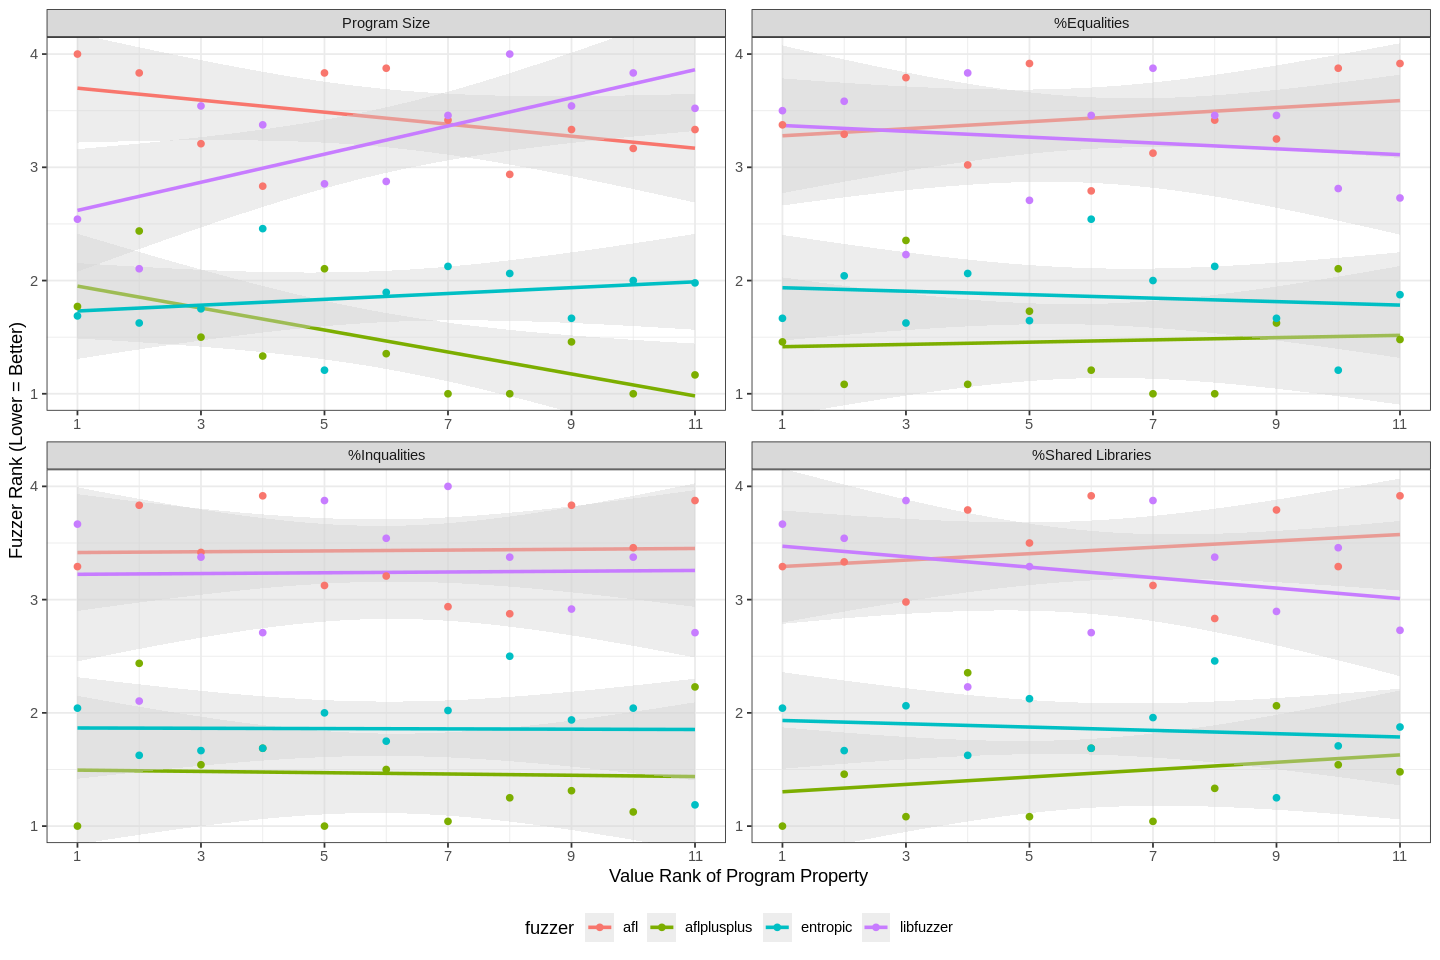

In [12]:
ggplot(dlm_program %>% filter(property!="total_indir") %>% group_by(fuzzer, property, value_rank) %>% summarize(fuzzer_rank = mean(fuzzer_rank)) %>% mutate(property = recode_properties(property)), aes(value_rank, fuzzer_rank)) +
  geom_smooth(aes(color=fuzzer),method="lm", fill="lightgrey") +
  geom_point(aes(color=fuzzer)) +
  xlab("Value Rank of Program Property") +
  ylab("Fuzzer Rank (Lower = Better)") +
  coord_cartesian(ylim=c(1,4)) +
  ylim(0,5) +
  scale_x_continuous(breaks=seq(1,11,2)) +
  #scale_x_log10(limits = c(1000,10000)) +
  facet_wrap( ~ property, scales="free",ncol=2) +
  theme(legend.position="bottom")
ggsave("~/Downloads/program.rank.pdf",scale=0.8,width=6)

#subset(dlm_program, property=="bin_text_size" & value > 7000)%>% group_by(fuzzer, property,value,benchmark) %>% summarize(fuzzer_rank = mean(fuzzer_rank))

`summarise()` has grouped output by 'fuzzer', 'property'. You can override using the `.groups` argument.
Saving 4.67 x 2.8 in image


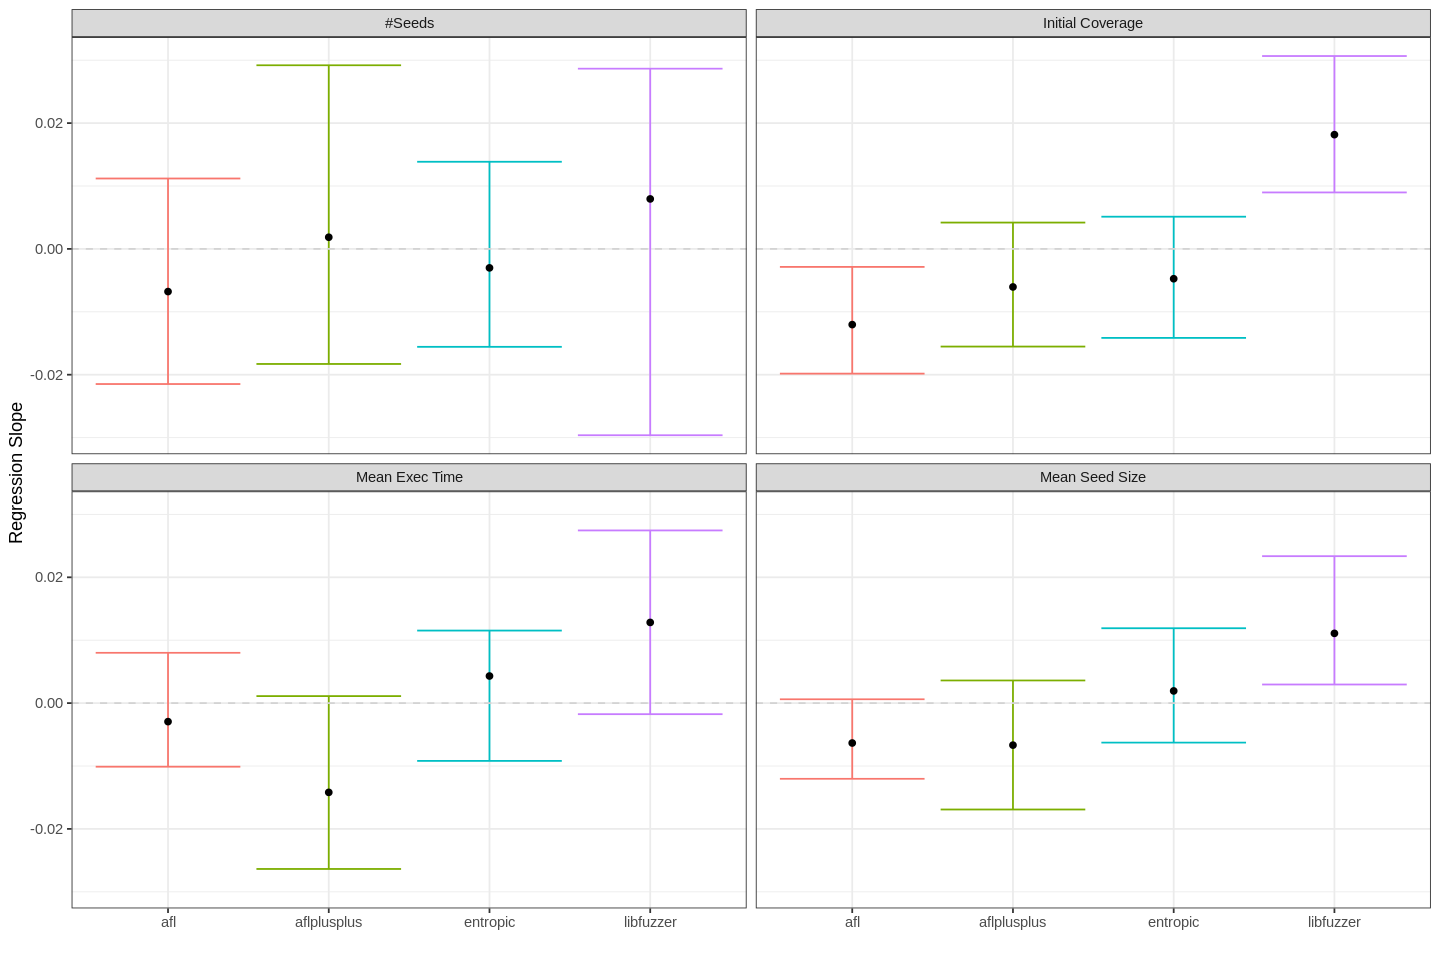

In [13]:
set.seed(3)

rsq_function <- function(formula, data, indices) {
  d <- data[indices,]
  fit <- lm(formula, data = d)
  return(summary(fit)$coefficients[2,1]) # return slope
}

bootstrap = dlm_corpus %>% ungroup() %>%
  group_by(fuzzer, property, value_rank) %>% 
  summarize(fuzzer_rank = mean(fuzzer_rank)) %>%
  group_by(fuzzer, property) %>%
  group_modify(~ {
    # Perform bootstrapping with 2000 replications
    reps <- boot(data=.x, statistic=rsq_function, R=2000, formula=fuzzer_rank ~ value_rank)
    bca = boot.ci(boot.out = reps, type = "bca")$bca
    estimate = summary(lm(fuzzer_rank ~ value_rank, data=.x))$coefficients[2,1]
    tibble::enframe(c(estimate = estimate, lower = bca[,4], upper = bca[,5]))
  }) %>% pivot_wider(names_from = name, values_from = value)

ggplot(bootstrap %>% mutate(property = recode_properties(property))) + 
  geom_errorbar(aes(x = fuzzer, ymin = lower, ymax = upper, color = fuzzer)) +
  geom_point(aes(fuzzer, estimate)) +
  geom_hline(yintercept=0, color = "lightgrey", linetype="dashed") +
  ylab("Regression Slope") +
  xlab("") +
  facet_wrap(~property) +
  theme(legend.position = "none")
ggsave("~/Downloads/coefficients.corpus.pdf", scale=0.7, height = 4)

write.csv(bootstrap %>% mutate(property = recode_properties(property)), "corpus-coeffs.csv", row.names=FALSE)

`summarise()` has grouped output by 'fuzzer', 'property'. You can override using the `.groups` argument.
Saving 4.67 x 2.8 in image


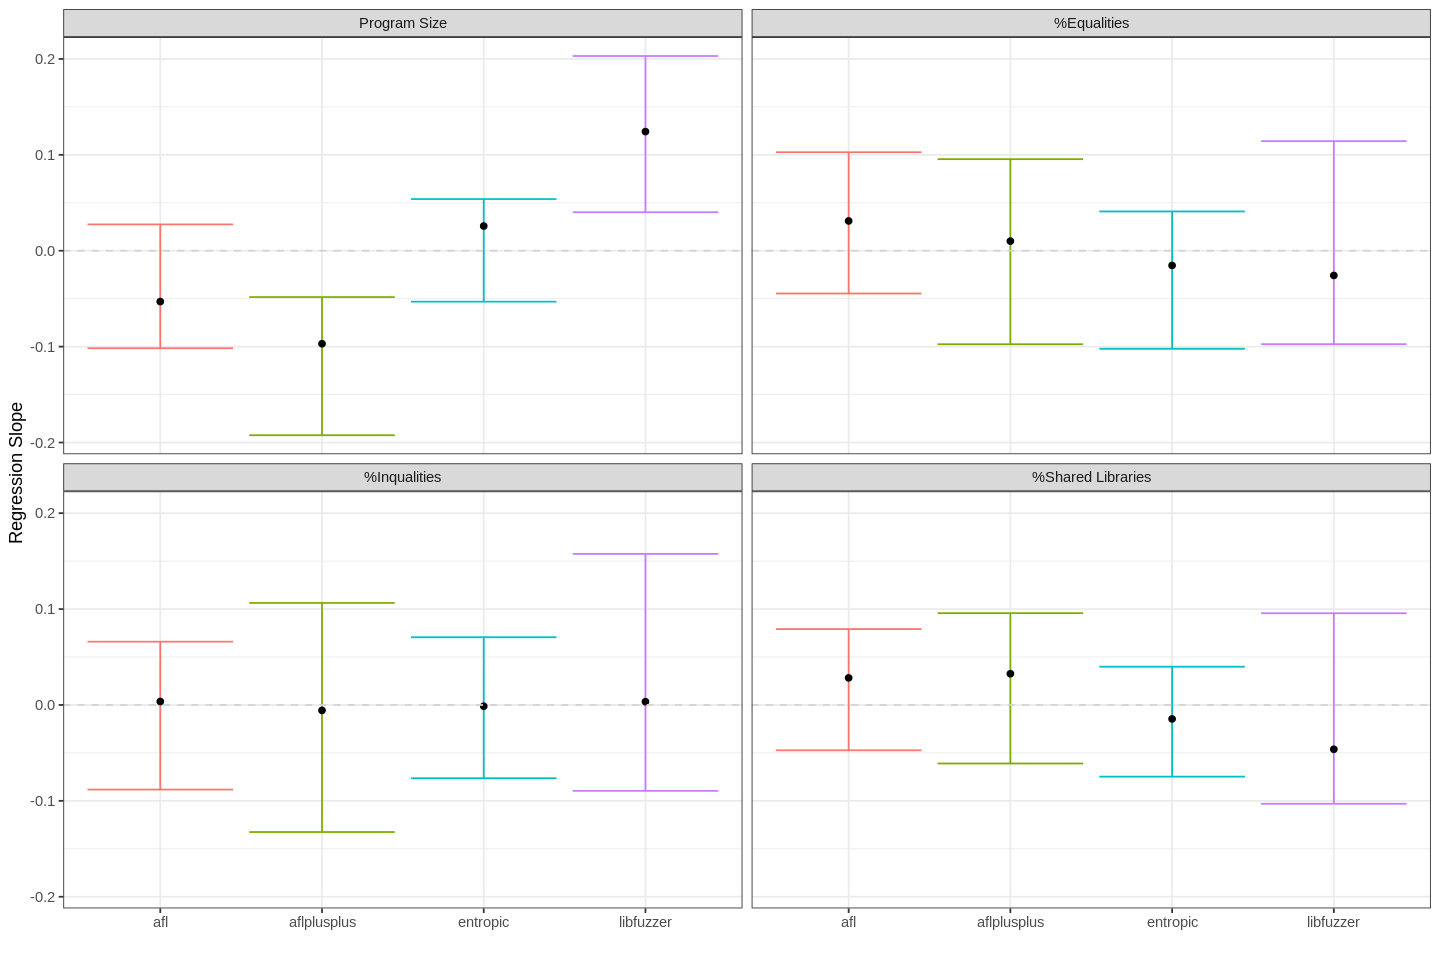

In [14]:

bootstrap = dlm_program %>% ungroup() %>% filter (property != "total_indir") %>%
  group_by(fuzzer, property, value_rank) %>% 
  summarize(fuzzer_rank = mean(fuzzer_rank)) %>%
  group_by(fuzzer, property) %>%
  group_modify(~ {
    # Perform bootstrapping with 2000 replications
    reps <- boot(data=.x, statistic=rsq_function, R=2000, formula=fuzzer_rank ~ value_rank)
    bca = boot.ci(boot.out = reps, type = "bca")$bca
    estimate = summary(lm(fuzzer_rank ~ value_rank, data=.x))$coefficients[2,1]
    tibble::enframe(c(estimate = estimate, lower = bca[,4], upper = bca[,5]))
  }) %>% pivot_wider(names_from = name, values_from = value)

ggplot(bootstrap %>% mutate(property = recode_properties(property))) + 
  geom_errorbar(aes(x = fuzzer, ymin = lower, ymax = upper, color = fuzzer)) +
  geom_point(aes(fuzzer, estimate)) +
  geom_hline(yintercept=0, color = "lightgrey", linetype="dashed") +
  ylab("Regression Slope") +
  xlab("") +
  facet_wrap(~property) +
  theme(legend.position = "none")
ggsave("~/Downloads/coefficients.program.pdf", scale=0.7, height = 4)

write.csv(bootstrap %>% mutate(property = recode_properties(property)), "program-coeffs.csv", row.names=FALSE)

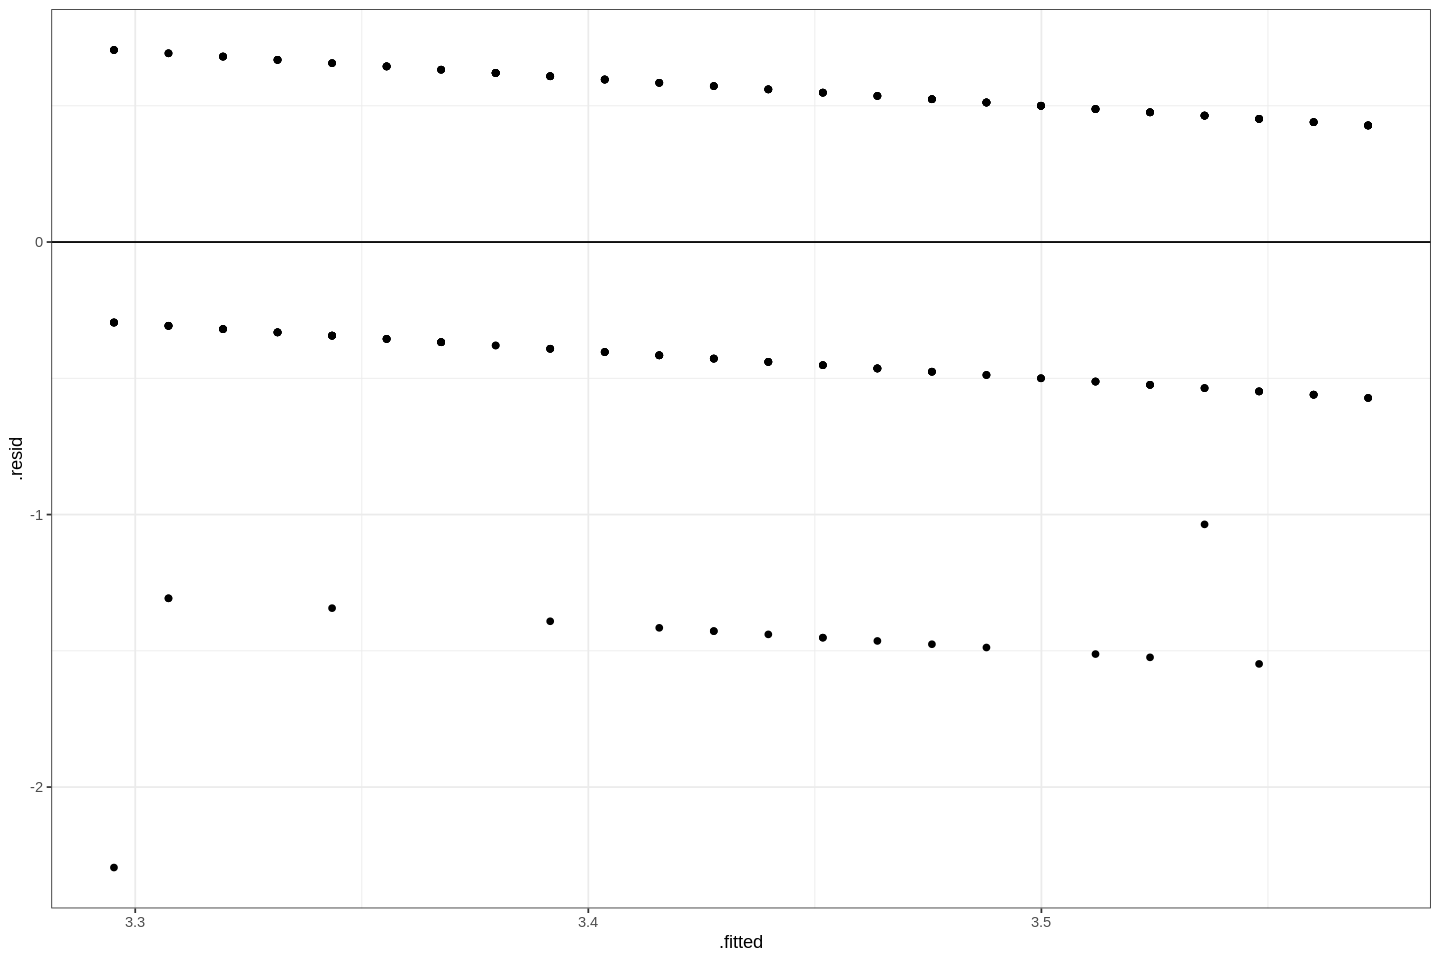

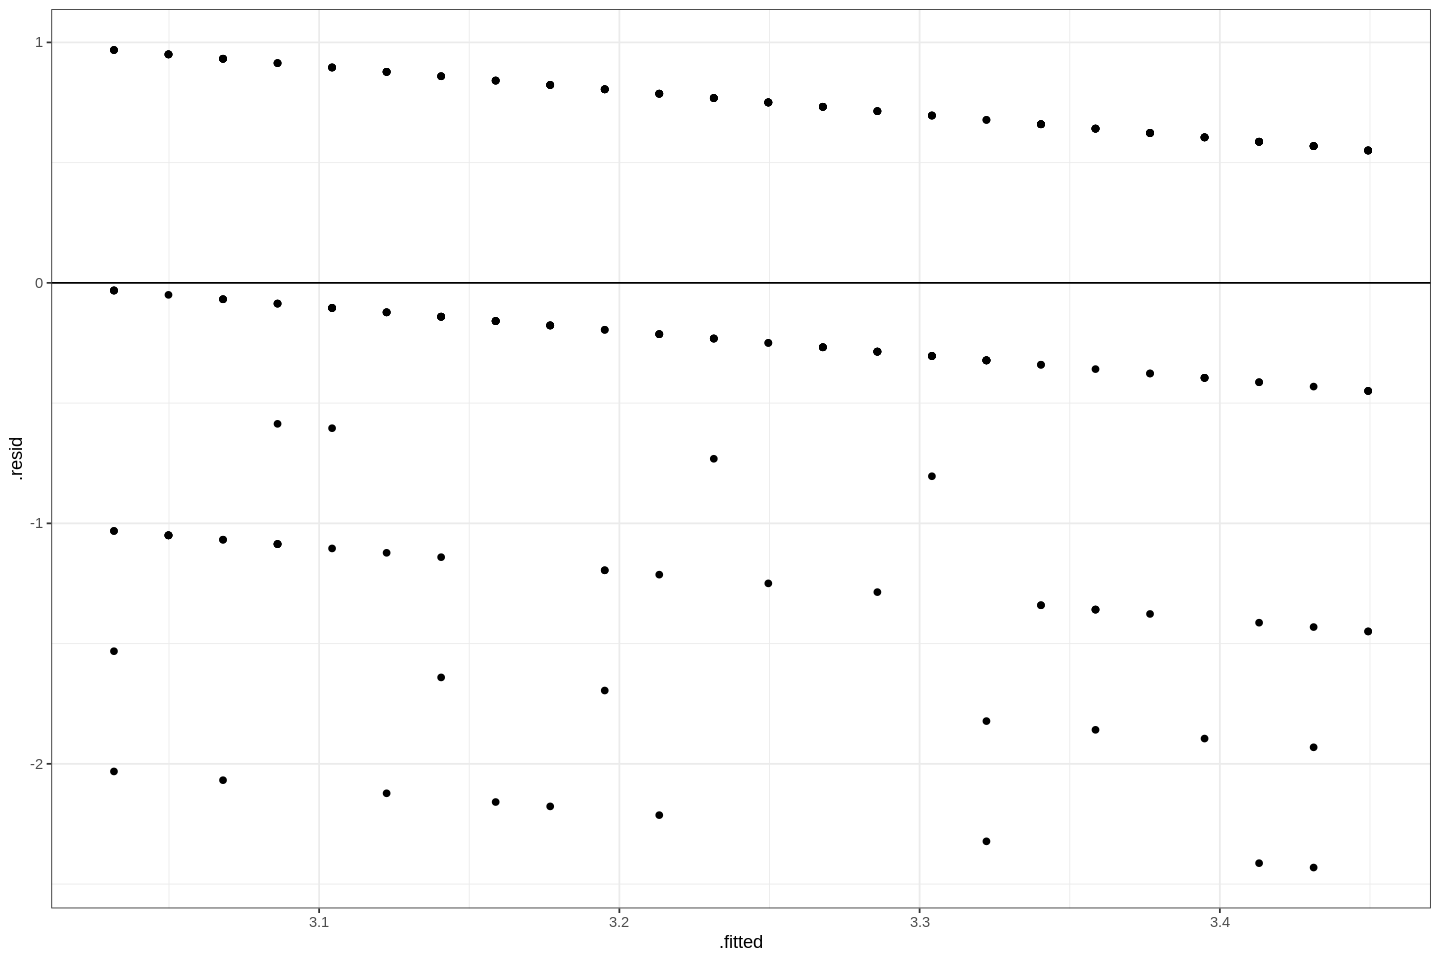

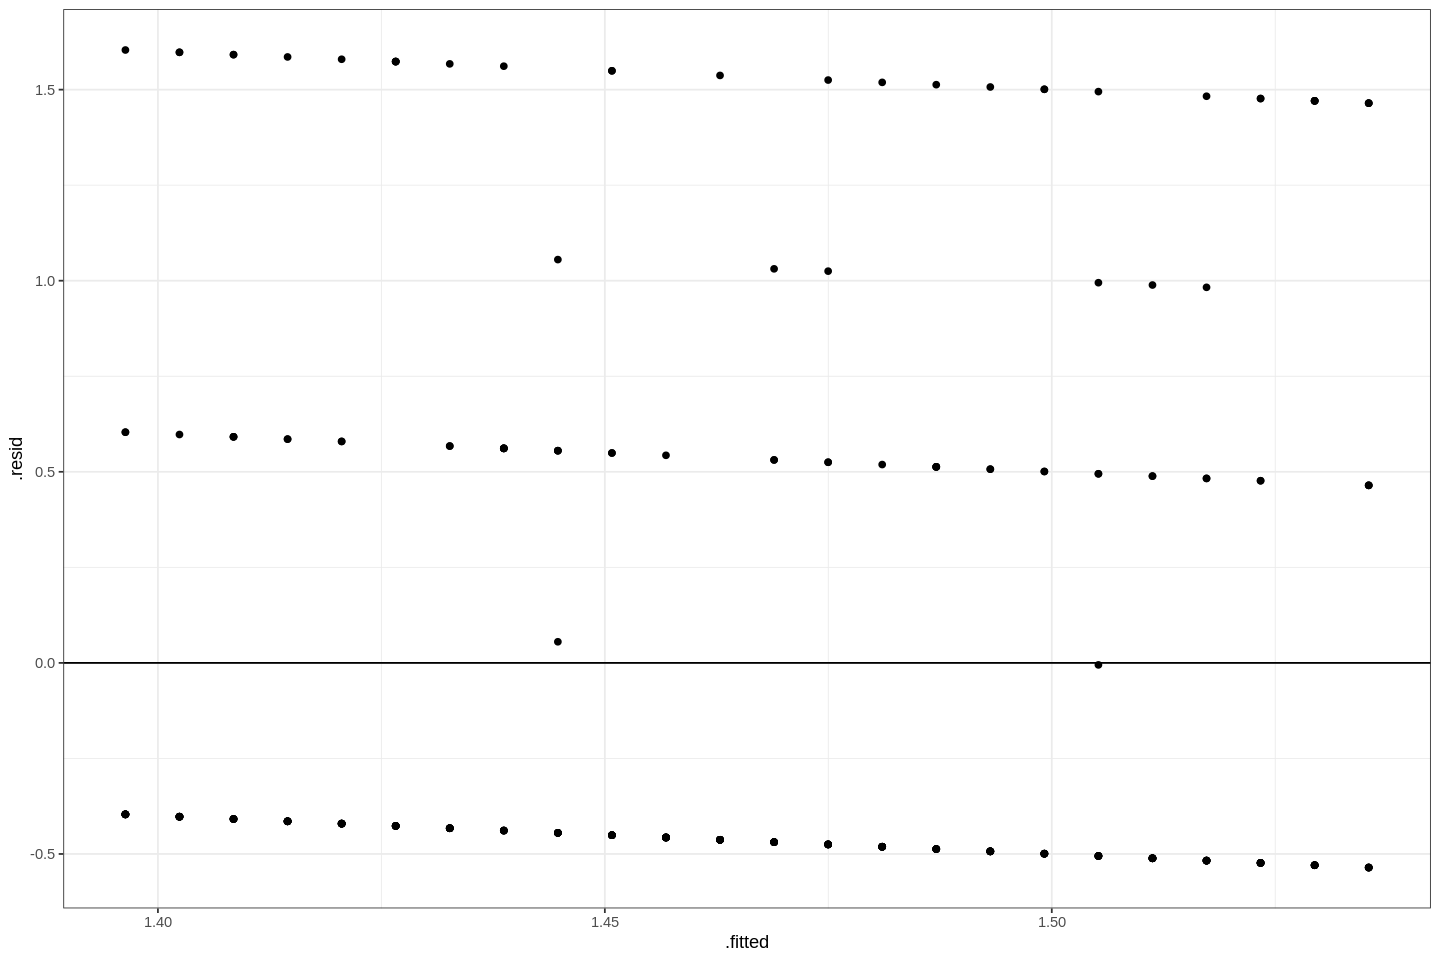

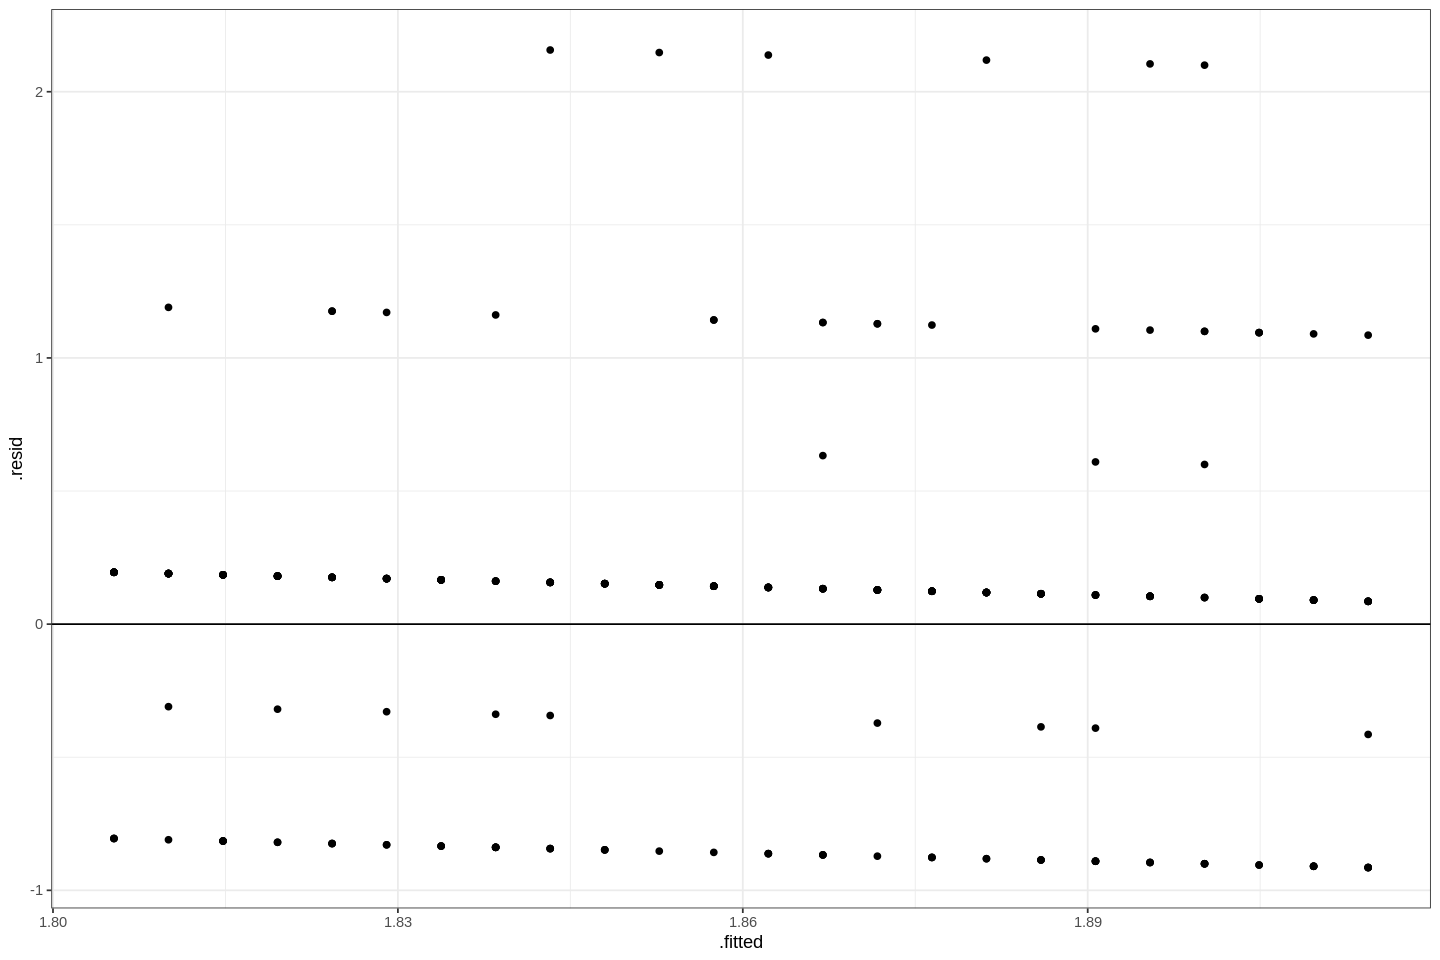

In [15]:
# Assessing Homoscedasicity
Property = "initial_coverage"
for (Fuzzer in unique(dlm_corpus$fuzzer)) {
  s = dlm_corpus %>% filter(fuzzer == Fuzzer, property == Property)
  model = lm(s$fuzzer_rank ~ s$value_rank)
  print(ggplot(fortify(model), aes(.fitted, .resid)) + geom_point() + geom_hline(yintercept=0))
}

In [16]:
# Grouping the data by properties
longer1 = dl %>% 
  select(per_target_trial, benchmark, fuzzer, edges_covered, initial_coverage, total_shared, total_eq, total_ineq, total_indir, bin_text_size, mean_exec_ns, mean_size_bytes, corpus_size) %>%
  mutate(coverage_increase = edges_covered - initial_coverage) %>%
  pivot_longer(c("total_shared", "total_eq", "total_ineq", "total_indir", "bin_text_size"), values_to="v_program", names_to="n_program") %>%
  pivot_longer(c("initial_coverage", "mean_exec_ns", "mean_size_bytes", "corpus_size"), values_to="v_corpus", names_to="n_corpus") %>%
  pivot_longer(c("edges_covered", "coverage_increase"), values_to = "v_edges", names_to="n_edges") 

program1 = longer1 %>% select(-n_corpus, -v_corpus, -n_edges, -v_edges) %>% dplyr::rename(property=n_program, value=v_program)
program1$group = "program"
corpus1 = longer1 %>% select(-n_program, -v_program, -n_edges, -v_edges) %>% dplyr::rename(property=n_corpus, value=v_corpus)
corpus1$group = "corpus"
edges1 = longer1 %>% select(-n_program, -v_program, -n_corpus, -v_corpus) %>% dplyr::rename(property=n_edges, value=v_edges)
edges1$group = "edges"
longer1 = unique(rbind(corpus1, program1, edges1))

dlm_corpus1 = longer1 %>% filter(group!="program")  %>% group_by(benchmark, group, property,fuzzer) %>% mutate(value_rank = rank(value, ties.method = "average"))
#dlm_program1 = longer1 %>% filter(group!="corpus")  %>% group_by(per_target_trial, group, property,fuzzer) %>% mutate(value_rank = rank(value, ties.method = "first"))
d1_corpus = dlm_corpus1 %>% ungroup() %>% select(-value,-group) %>% pivot_wider(names_from=property, values_from = value_rank) %>% pivot_longer(cols = -c(benchmark, fuzzer, per_target_trial, edges_covered, coverage_increase), names_to="property", values_to = "value")
head(d1_corpus)


per_target_trial,benchmark,fuzzer,edges_covered,coverage_increase,property,value
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
0,harfbuzz-1.3.2,afl,7.0,20,initial_coverage,6
0,harfbuzz-1.3.2,afl,7.0,20,mean_exec_ns,14
0,harfbuzz-1.3.2,afl,7.0,20,mean_size_bytes,21
0,harfbuzz-1.3.2,afl,7.0,20,corpus_size,7
0,libjpeg-turbo-07-2017,afl,22.5,17,initial_coverage,15
0,libjpeg-turbo-07-2017,afl,22.5,17,mean_exec_ns,17


Warning message:
“There were 224 warnings in `summarise()`.
The first warning was:
ℹ In argument: `benchmark = (function (x, ...) ...`.
ℹ In group 1: `property = #Seeds`, `value = 1`.
Caused by warning in `mean.default()`:
! argument is not numeric or logical: returning NA
ℹ Run `dplyr::last_dplyr_warnings()` to see the 223 remaining warnings.”


[1] "#Seeds vs #Edges_Covered"


[1] 0.7439081

[1] "#Initial_Edges_Covered vs #Edges_Covered"


[1] 0.7900564

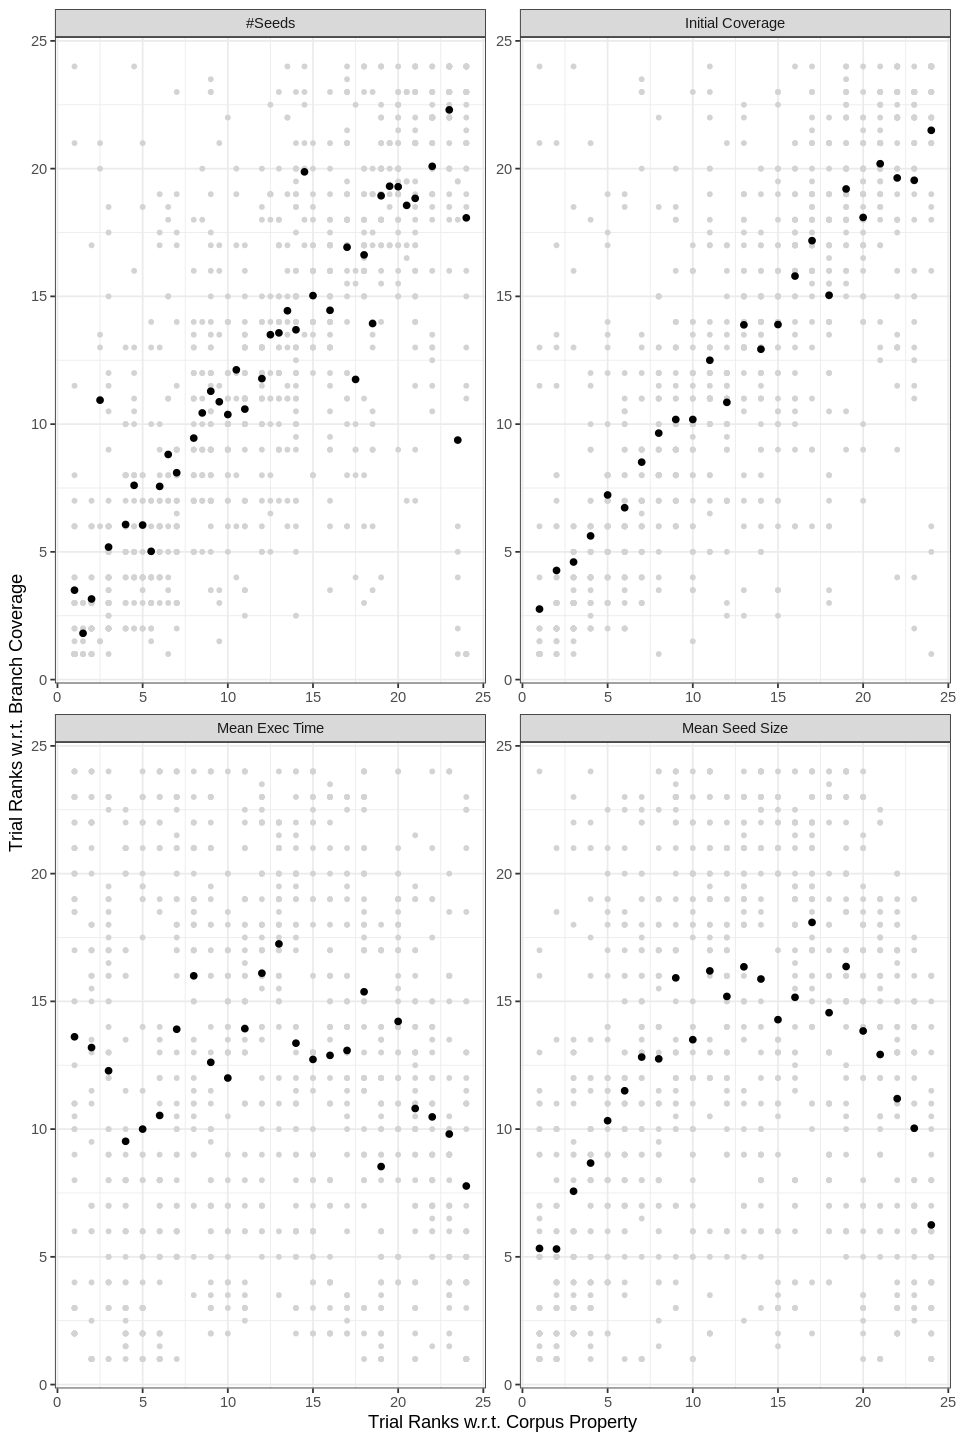

In [17]:
options(repr.plot.width=8, repr.plot.height=12)
ggplot(d1_corpus %>% mutate(property = recode_properties(property))) + 
  geom_point(aes(value,edges_covered), color="lightgrey", size=1) + 
  geom_point(data=d1_corpus %>% mutate(property = recode_properties(property)) %>% group_by(property, value) %>% summarize_all(mean), aes(value, edges_covered), shape=19) +
  facet_wrap( ~ property, scales="free",ncol=2) +
  xlab("Trial Ranks w.r.t. Corpus Property") +
  ylab("Trial Ranks w.r.t. Branch Coverage")
#ggsave("~/Downloads/coverage.increase.corpus.pdf", scale=0.8)

print("#Seeds vs #Edges_Covered")
cor((d1_corpus %>% filter(property=="corpus_size"))$value, (d1_corpus %>% filter(property=="corpus_size"))$edges_covered)

print("#Initial_Edges_Covered vs #Edges_Covered")
cor((d1_corpus %>% filter(property=="initial_coverage"))$value, (d1_corpus %>% filter(property=="initial_coverage"))$edges_covered)

  #geom_smooth() + 
  #theme(legend.position="none")

#ggplot(d1 %>% group_by(benchmark, property, value) %>% summarize_all(mean), aes(value,coverage_incease)) + geom_point() + facet_grid(benchmark ~ property, scales="free") + geom_smooth()
#ggplot(d1, aes(value,edges_covered)) + geom_point(aes(color=fuzzer)) + facet_grid(benchmark ~ property, scale="free")

In [18]:
s = dlm_program %>%
  filter(property != "total_indir") %>%
  group_by(fuzzer, property) %>%
  mutate(
    coverage_increase_rank = rank(coverage_increase, ties.method = "first"),
    coverage_rank = rank(edges_covered, ties.method = "first"),
    value_rank = rank(value, ties.method = "first"),
    n=n()
  ) %>% 
  ungroup() %>% 
  group_by(fuzzer, property, value_rank) %>% 
  summarize(coverage_increase_rank = mean(coverage_increase_rank), coverage_rank=mean(coverage_rank), value_rank = mean(value_rank)) %>%
  mutate(property = recode_properties(property))
head(s)

`summarise()` has grouped output by 'fuzzer', 'property'. You can override using the `.groups` argument.


fuzzer,property,value_rank,coverage_increase_rank,coverage_rank
<chr>,<fct>,<dbl>,<dbl>,<dbl>
afl,Program Size,1,28,55
afl,Program Size,2,100,33
afl,Program Size,3,120,30
afl,Program Size,4,129,35
afl,Program Size,5,116,39
afl,Program Size,6,106,31


`summarise()` has grouped output by 'property'. You can override using the `.groups` argument.
`geom_smooth()` using formula = 'y ~ x'
Saving 5.33 x 5.33 in image
`geom_smooth()` using formula = 'y ~ x'


[1] "Program Size"
[1] 0.7440003
[1] "%Equalities"
[1] 0.01401741
[1] "%Inqualities"
[1] 0.03291338
[1] "%Shared Libraries"
[1] -0.1973104


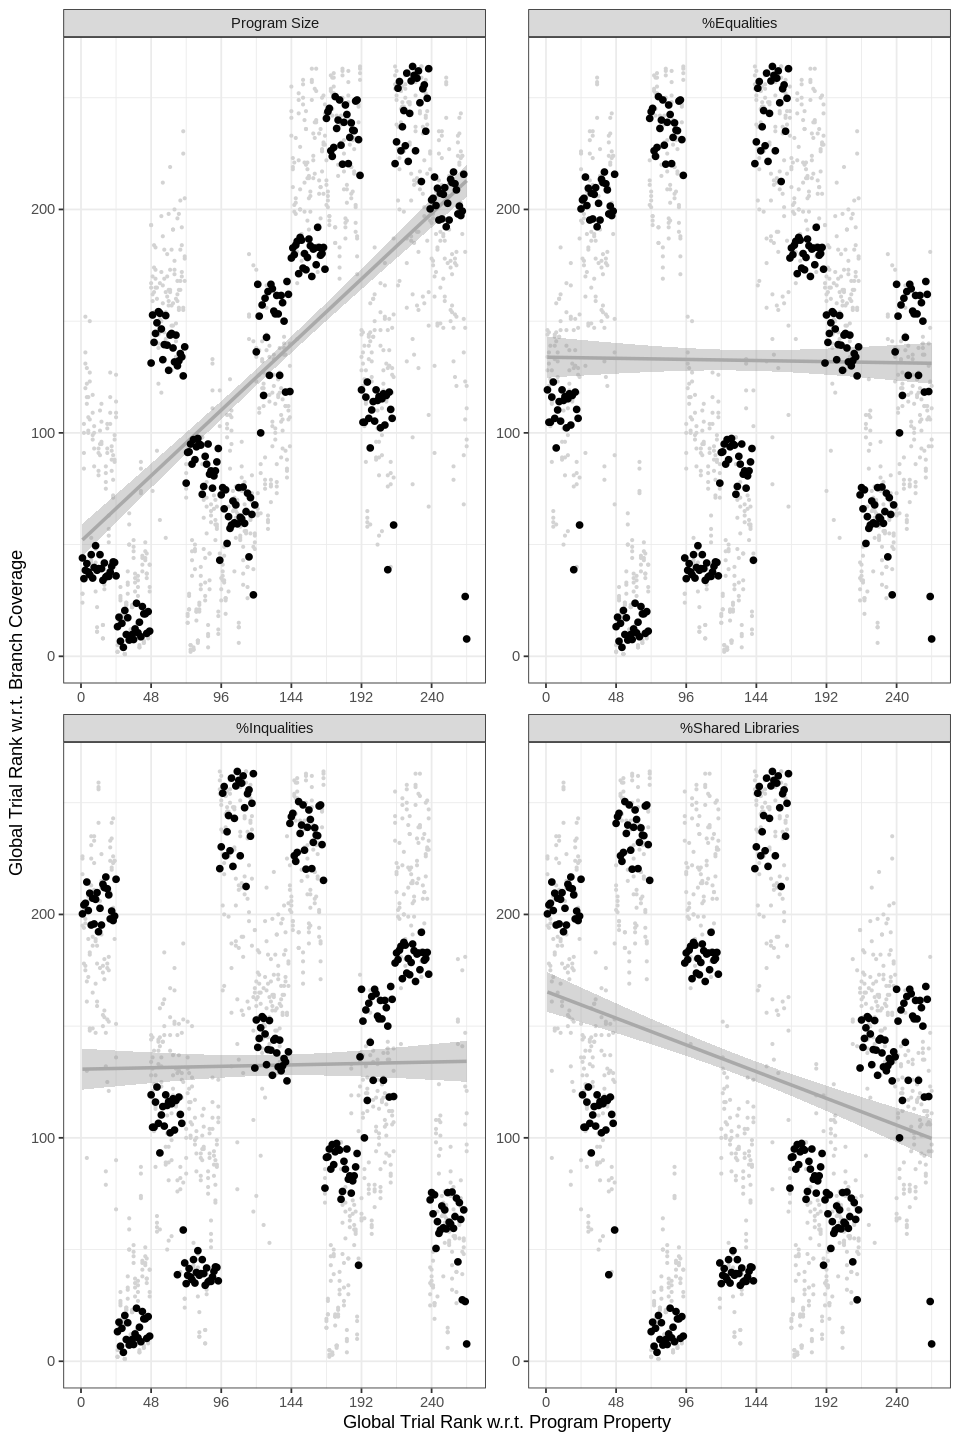

In [19]:
ggplot(s, aes(value_rank, coverage_increase_rank)) + 
  #geom_vline(xintercept=seq(0,11*24, 24), color="grey", linetype="dashed") +
  geom_point(color="lightgray",size=0.5) +
  geom_smooth(method="lm",color="darkgrey") +
  geom_point(data=s %>% group_by(property,value_rank) %>% summarize(coverage_rank = mean(coverage_rank),coverage_increase_rank=mean(coverage_increase_rank)), aes(value_rank, coverage_rank)) +
  xlab("Global Trial Rank w.r.t. Program Property") +
  ylab("Global Trial Rank w.r.t. Branch Coverage") +
  scale_x_continuous(breaks = seq(0,11*24,48)) +
  facet_wrap(. ~ property, scales="free")

ggsave("~/Downloads/coverage.increase.program.pdf", scale=0.8)

for (Property in unique(s$property)) {
  print(Property)
  print(cor((s %>% filter(property == Property))$value_rank, (s %>% filter(property == Property))$coverage_rank))
}

In [20]:
dlm_program1 = longer1 %>% filter(group!="corpus", property != "total_indir") %>% group_by(per_target_trial, group, property,fuzzer) %>% mutate(value_rank = rank(-value, ties.method = "first"))
d1_program1 = dlm_program1 %>% ungroup() %>% select(-value,-group) %>% pivot_wider(names_from=property, values_from = value_rank) %>% pivot_longer(cols = -c(benchmark, fuzzer, per_target_trial,edges_covered, coverage_increase), names_to="property", values_to = "value")

ggplot(d1_program %>% mutate(property = recode_properties(property)) ,aes(value,coverage_increase)) + 
  geom_point(color="lightgrey") + 
  geom_smooth(method="lm") +
  #geom_point(data=d1_program %>% group_by(property, value) %>% summarize_all(mean), aes(value,coverage_increase), shape=19,size=2) +
  facet_wrap( ~ property, scales="free",ncol=2) +
  xlab("Trial Ranks w.r.t. Program Property") +
  ylab("Trial Ranks w.r.t. Coverage Increase")

ERROR: Error in mutate(., property = recode_properties(property)): object 'd1_program' not found


In [ ]:
longer1

In [21]:
#dlm2 = longer1 %>% group_by(benchmark, group, property, per_target_trial) %>% mutate(fuzzer_rank = rank(-edges_covered, ties.method = "average"))
#dlm_corpus1 = longer1 %>% filter(group!="program")  %>% group_by(benchmark, group, property,fuzzer) %>% mutate(value_rank = rank(value, ties.method = "first"))
#dlm_program2 = longer1 %>% filter(group!="corpus", property != "total_indir") %>% group_by(per_target_trial, group, property,fuzzer) %>% mutate(value_rank = rank(-value, ties.method = "first"))

a = dlm_corpus1 %>% ungroup() %>% select(-value,-group) %>% pivot_wider(names_from=property, values_from = value_rank) %>% group_by(benchmark, per_target_trial) %>% mutate(fuzzer_rank = rank(-edges_covered, ties.method = "average"))
b = dlm_program1 %>% ungroup() %>% select(-value,-group) %>% pivot_wider(names_from=property, values_from = value_rank) %>% group_by(benchmark, per_target_trial) %>% mutate(fuzzer_rank = rank(-edges_covered, ties.method = "average"))

dlm1 = a %>% left_join(b %>% select(-edges_covered, -coverage_increase, -fuzzer_rank))
head(dlm1)
lm(dlm1$edges_covered ~ dlm1$initial_coverage + dlm1$mean_size_bytes + dlm1$bin_text_size)
lm(dlm1$edges_covered ~ dlm1$fuzzer) #How to interpret this?
lm(dlm1$edges_covered ~ dlm1$fuzzer * (dlm1$initial_coverage + dlm1$mean_size_bytes + dlm1$bin_text_size)) # How to interprete this?

Joining with `by = join_by(per_target_trial, benchmark, fuzzer)`


per_target_trial,benchmark,fuzzer,initial_coverage,mean_exec_ns,mean_size_bytes,corpus_size,edges_covered,coverage_increase,fuzzer_rank,total_shared,total_eq,total_ineq,bin_text_size
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
0,harfbuzz-1.3.2,afl,6,14,21,7.0,7.0,20,3.0,8,6,6,5
0,libjpeg-turbo-07-2017,afl,15,17,6,14.5,22.5,17,2.0,9,7,4,3
0,libpcap_fuzz_both,afl,3,24,1,8.0,5.0,22,2.5,6,8,9,9
0,libpng-1.2.56,afl,22,10,18,19.0,24.0,3,1.0,10,10,10,11
0,libxslt_xpath,afl,9,22,14,9.0,7.0,16,4.0,3,2,2,1
0,mbedtls_fuzz_dtlsclient,afl,7,12,5,9.0,7.0,21,3.0,2,4,7,6



Call:
lm(formula = dlm1$edges_covered ~ dlm1$initial_coverage + dlm1$mean_size_bytes + 
    dlm1$bin_text_size)

Coefficients:
          (Intercept)  dlm1$initial_coverage   dlm1$mean_size_bytes  
             3.114695               0.803144              -0.050555  
   dlm1$bin_text_size  
            -0.003676  



Call:
lm(formula = dlm1$edges_covered ~ dlm1$fuzzer)

Coefficients:
           (Intercept)  dlm1$fuzzeraflplusplus     dlm1$fuzzerentropic  
             1.250e+01               3.508e-15              -1.803e-15  
  dlm1$fuzzerlibfuzzer  
            -9.277e-16  



Call:
lm(formula = dlm1$edges_covered ~ dlm1$fuzzer * (dlm1$initial_coverage + 
    dlm1$mean_size_bytes + dlm1$bin_text_size))

Coefficients:
                                 (Intercept)  
                                   9.846e-01  
                      dlm1$fuzzeraflplusplus  
                                   2.787e+00  
                         dlm1$fuzzerentropic  
                                   2.526e+00  
                        dlm1$fuzzerlibfuzzer  
                                   3.192e+00  
                       dlm1$initial_coverage  
                                   9.193e-01  
                        dlm1$mean_size_bytes  
                                   3.210e-03  
                          dlm1$bin_text_size  
                                  -2.586e-03  
dlm1$fuzzeraflplusplus:dlm1$initial_coverage  
                                  -1.589e-01  
   dlm1$fuzzerentropic:dlm1$initial_coverage  
                                  -1.451e-01  
  dlm1$fuz

In [22]:
s = dlm_corpus %>% ungroup() %>% select(-value,-group,-n) %>% pivot_wider(names_from=property, values_from = value_rank) %>% mutate(fuzzer = relevel(as.factor(fuzzer), ref = "libfuzzer"))
t = dlm_program %>% ungroup() %>% select(-value,-group,-n) %>% pivot_wider(names_from=property, values_from = value_rank) %>% mutate(fuzzer = relevel(as.factor(fuzzer), ref = "libfuzzer"))
s = s %>% left_join(t)
m = lm(fuzzer_rank ~ fuzzer + benchmark, s)
summary(m)

Joining with `by = join_by(per_target_trial, benchmark, fuzzer, edges_covered, coverage_increase, fuzzer_rank)`



Call:
lm(formula = fuzzer_rank ~ fuzzer + benchmark, data = s)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4337 -0.4659  0.1401  0.5663  2.1402 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                           3.241e+00  8.309e-02  39.002  < 2e-16 ***
fuzzerafl                             1.932e-01  6.281e-02   3.076  0.00215 ** 
fuzzeraflplusplus                    -1.775e+00  6.281e-02 -28.255  < 2e-16 ***
fuzzerentropic                       -1.381e+00  6.281e-02 -21.983  < 2e-16 ***
benchmarkharfbuzz-1.3.2               7.895e-15  1.042e-01   0.000  1.00000    
benchmarklibjpeg-turbo-07-2017       -4.683e-15  1.042e-01   0.000  1.00000    
benchmarklibpcap_fuzz_both           -4.070e-15  1.042e-01   0.000  1.00000    
benchmarklibpng-1.2.56               -1.747e-16  1.042e-01   0.000  1.00000    
benchmarklibxslt_xpath                5.403e-16  1.042e-01   0.000  1.00000    
benchmarkmbedtls_fuzz_dtlsc

In [17]:
s = dlm_corpus %>% ungroup() %>% select(-value,-group,-n) %>% pivot_wider(names_from=property, values_from = value_rank) %>% mutate(fuzzer = relevel(as.factor(fuzzer), ref = "libfuzzer"))
t = dlm_program %>% ungroup() %>% select(-value,-group,-n) %>% pivot_wider(names_from=property, values_from = value_rank) %>% mutate(fuzzer = relevel(as.factor(fuzzer), ref = "libfuzzer"))
s = s %>% left_join(t)
model = lm(data = s, formula = fuzzer_rank ~  fuzzer * (mean_exec_ns + mean_size_bytes + initial_coverage))
print(summary(model))
reps = wild.boot(formula=(s$fuzzer_rank ~  s$fuzzer * (s$mean_exec_ns + s$mean_size_bytes + s$initial_coverage)), B=2000)

i=1
coefficients = summary(model)$coefficients[,1]
for (name in names(coefficients)) {
  bca = quantile(reps$bootEstParam[,i], probs=c(.05, .95))
  Estimate = coefficients[[name]]
  s = data.frame(coefficient=name, estimate = Estimate, lower = bca[["5%"]], upper = bca[["95%"]])
  if (i == 1) {
    bootstrap2 = s 
  } else {
    bootstrap2 = rbind(bootstrap2, s)
  }
  #print(bca)
  i = i + 1
}
bootstrap2


Joining with `by = join_by(per_target_trial, benchmark, fuzzer, edges_covered, coverage_increase,
fuzzer_rank)`



Call:
lm(formula = fuzzer_rank ~ fuzzer * (mean_exec_ns + mean_size_bytes + 
    initial_coverage), data = s)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.37148 -0.45276  0.06378  0.56144  2.13370 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         2.7849702  0.1337938  20.815  < 2e-16 ***
fuzzerafl                           0.8740475  0.1894781   4.613 4.46e-06 ***
fuzzeraflplusplus                  -1.0195010  0.1889984  -5.394 8.52e-08 ***
fuzzerentropic                     -0.9397971  0.1892776  -4.965 8.02e-07 ***
mean_exec_ns                        0.0141718  0.0064564   2.195  0.02838 *  
mean_size_bytes                     0.0038713  0.0067329   0.575  0.56542    
initial_coverage                    0.0184017  0.0067161   2.740  0.00625 ** 
fuzzerafl:mean_exec_ns             -0.0180533  0.0091346  -1.976  0.04838 *  
fuzzeraflplusplus:mean_exec_ns     -0.0286762  0.0091334  -3.140  0.

coefficient,estimate,lower,upper
<chr>,<dbl>,<dbl>,<dbl>
(Intercept),2.7849702350,2.521304515,3.0749019781
fuzzerafl,0.8740474761,0.528810488,1.1887390348
fuzzeraflplusplus,-1.0195010229,-1.396546624,-0.6492894934
fuzzerentropic,-0.9397970526,-1.283059566,-0.6021952287
mean_exec_ns,0.0141718399,0.001040790,0.0266388945
mean_size_bytes,0.0038713046,-0.009524417,0.0170106427
initial_coverage,0.0184016609,0.005257694,0.0317399124
fuzzerafl:mean_exec_ns,-0.0180533159,-0.034150485,-0.0008303618
fuzzeraflplusplus:mean_exec_ns,-0.0286762394,-0.046104965,-0.0120451072


In [1]:
library(scales)

s = dlm_corpus %>% ungroup() %>% select(-value,-group,-n) %>% pivot_wider(names_from=property, values_from = value_rank) %>% mutate(fuzzer = relevel(as.factor(fuzzer), ref = "libfuzzer"))
t = dlm_program %>% ungroup() %>% select(-value,-group,-n) %>% pivot_wider(names_from=property, values_from = value_rank) %>% mutate(fuzzer = relevel(as.factor(fuzzer), ref = "libfuzzer"))
s = s %>% left_join(t)

merged_d <- merge(dl, s, by=c("per_target_trial", "benchmark", "fuzzer"))
scaled_d <- merged_d %>% select(fuzzer, benchmark, mean_exec_ns.x, mean_size_bytes.x, initial_coverage.x, bin_text_size.x, total_eq.x) %>%
    mutate_if(is.numeric, rescale)
scaled_d$per_target_trial <- merged_d$per_target_trial
scaled_d$fuzzer_rank <- merged_d$fuzzer_rank

scaled_d <- scaled_d %>% drop_na()


ERROR: Error in dlm_corpus %>% ungroup() %>% select(-value, -group, -n) %>% pivot_wider(names_from = property, : could not find function "%>%"


In [16]:
# NESTED CV, split data per benchmark -- doesn't work, too much variance between benchmarks!

s = dlm_corpus %>% ungroup() %>% select(-value,-group,-n) %>% pivot_wider(names_from=property, values_from = value_rank) %>% mutate(fuzzer = relevel(as.factor(fuzzer), ref = "libfuzzer"))
t = dlm_program %>% ungroup() %>% select(-value,-group,-n) %>% pivot_wider(names_from=property, values_from = value_rank) %>% mutate(fuzzer = relevel(as.factor(fuzzer), ref = "libfuzzer"))
s = s %>% left_join(t)

set.seed(1234)

outerfolds <- groupKFold(s$benchmark, k = 10)

i <- 0
accuracy <- data.frame()
for (outerfold in outerfolds) {
    inner <- s[outerfold,]
    tst <- s %>% filter(!benchmark %in% unique(inner$benchmark))
    
    # print(length(unique(inner$benchmark)))
    innerfolds <- groupKFold(inner$benchmark, k = 7)
    print(length(innerfolds))
    
    ctrl <- trainControl(method = "cv", index=innerfolds, savePredictions = TRUE)
    
    model <- train(fuzzer_rank ~  fuzzer * (mean_exec_ns + mean_size_bytes + initial_coverage + bin_text_size),
               data=inner,
               method="lm",
               trControl=ctrl
               )
    
    trad_model <- train(fuzzer_rank ~  fuzzer,
           data=inner,
           method="lm",
           trControl=ctrl
    )
    
    mfr <- inner %>% group_by(fuzzer) %>% select(fuzzer_rank) %>% summarize(mean = mean(fuzzer_rank))
    mfr$rank <- rank(mfr$mean)
    mfr$fuzzer <- as.factor(mfr$fuzzer)
    
    dumb_ranker <- function(f) {
        mfr[mfr["fuzzer"] == as.character(f), "rank"]
    }
    p <- as.numeric(unlist(lapply(tst$fuzzer, dumb_ranker)))


    acc <- mean(abs(tst$fuzzer_rank - predict(model, tst)) <= 0.5)
        
    trad_mod_acc <- mean(abs(tst$fuzzer_rank - predict(trad_model, tst)) <= 0.5)
    
    trad_acc <- mean(tst$fuzzer_rank == p)
    
    row = data.frame(holistic=acc,  trad_mod=trad_mod_acc, trad=trad_acc)
    accuracy <- rbind(accuracy, row)
}
accuracy$diff <- accuracy$holistic - accuracy$trad
print(accuracy)
print(colMeans(accuracy))
sapply(accuracy, sd)

Joining with `by = join_by(per_target_trial, benchmark, fuzzer, edges_covered, coverage_increase,
fuzzer_rank)`


[1] 4


Adding missing grouping variables: `fuzzer`


[1] 7


Adding missing grouping variables: `fuzzer`


[1] 6


Adding missing grouping variables: `fuzzer`


[1] 5


Adding missing grouping variables: `fuzzer`


[1] 4


Adding missing grouping variables: `fuzzer`


[1] 6


Adding missing grouping variables: `fuzzer`


[1] 4


Adding missing grouping variables: `fuzzer`


   holistic  trad_mod      trad        diff
1 0.3229167 0.2395833 0.4062500 -0.08333333
2 0.2708333 0.4687500 0.4270833 -0.15625000
3 0.6041667 0.4427083 0.5468750  0.05729167
4 0.6493056 0.4201389 0.5590278  0.09027778
5 0.4166667 0.1979167 0.3437500  0.07291667
6 0.4791667 0.3333333 0.5625000 -0.08333333
7 0.7552083 0.4843750 0.6354167  0.11979167
   holistic    trad_mod        trad        diff 
0.499751984 0.369543651 0.497271825 0.002480159 


holistic  trad_mod      trad      diff 
0.1777302 0.1144536 0.1051929 0.1075168

Joining with `by = join_by(per_target_trial, benchmark, fuzzer, edges_covered, coverage_increase, fuzzer_rank)`



Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.31538 -0.41417  0.05314  0.35958  2.21768 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                           3.274390   0.045746  71.577  < 2e-16 ***
fuzzerafl                             0.199012   0.065668   3.031 0.002522 ** 
fuzzeraflplusplus                    -1.821987   0.065393 -27.862  < 2e-16 ***
fuzzerentropic                       -1.438291   0.064136 -22.426  < 2e-16 ***
mean_exec_ns                          0.008375   0.006895   1.215 0.224823    
mean_size_bytes                       0.009619   0.006866   1.401 0.161611    
initial_coverage                      0.019878   0.006875   2.891 0.003942 ** 
bin_text_size                         0.112531   0.014117   7.971 5.62e-15 ***
`fuzzerafl:mean_exec_ns`             -0.019801   0.009746  -2.032 0.042519 *  
`fuzzeraflplusplus:mean_exec_ns`     -0.02306


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2711 -0.4663  0.1651  0.5419  2.1651 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        3.27114    0.04948  66.114  < 2e-16 ***
fuzzerafl          0.18697    0.07088   2.638  0.00851 ** 
fuzzeraflplusplus -1.80482    0.07069 -25.530  < 2e-16 ***
fuzzerentropic    -1.43622    0.06930 -20.725  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7015 on 790 degrees of freedom
Multiple R-squared:  0.6043,	Adjusted R-squared:  0.6027 
F-statistic: 402.1 on 3 and 790 DF,  p-value: < 2.2e-16


Adding missing grouping variables: `fuzzer`


[1] 388.7237
[1] 982.2497
[1] "dof"
[1] 790
[1] "rsq_trad"
[1] 0.6042517
[1] "adj_rsq_trad"
[1] 0.6065463
[1] "trad:"


[1] 0.4961832

[1] "ours:"


[1] 0.5954198

[1] "fuzzer only:"


[1] 0.4770992

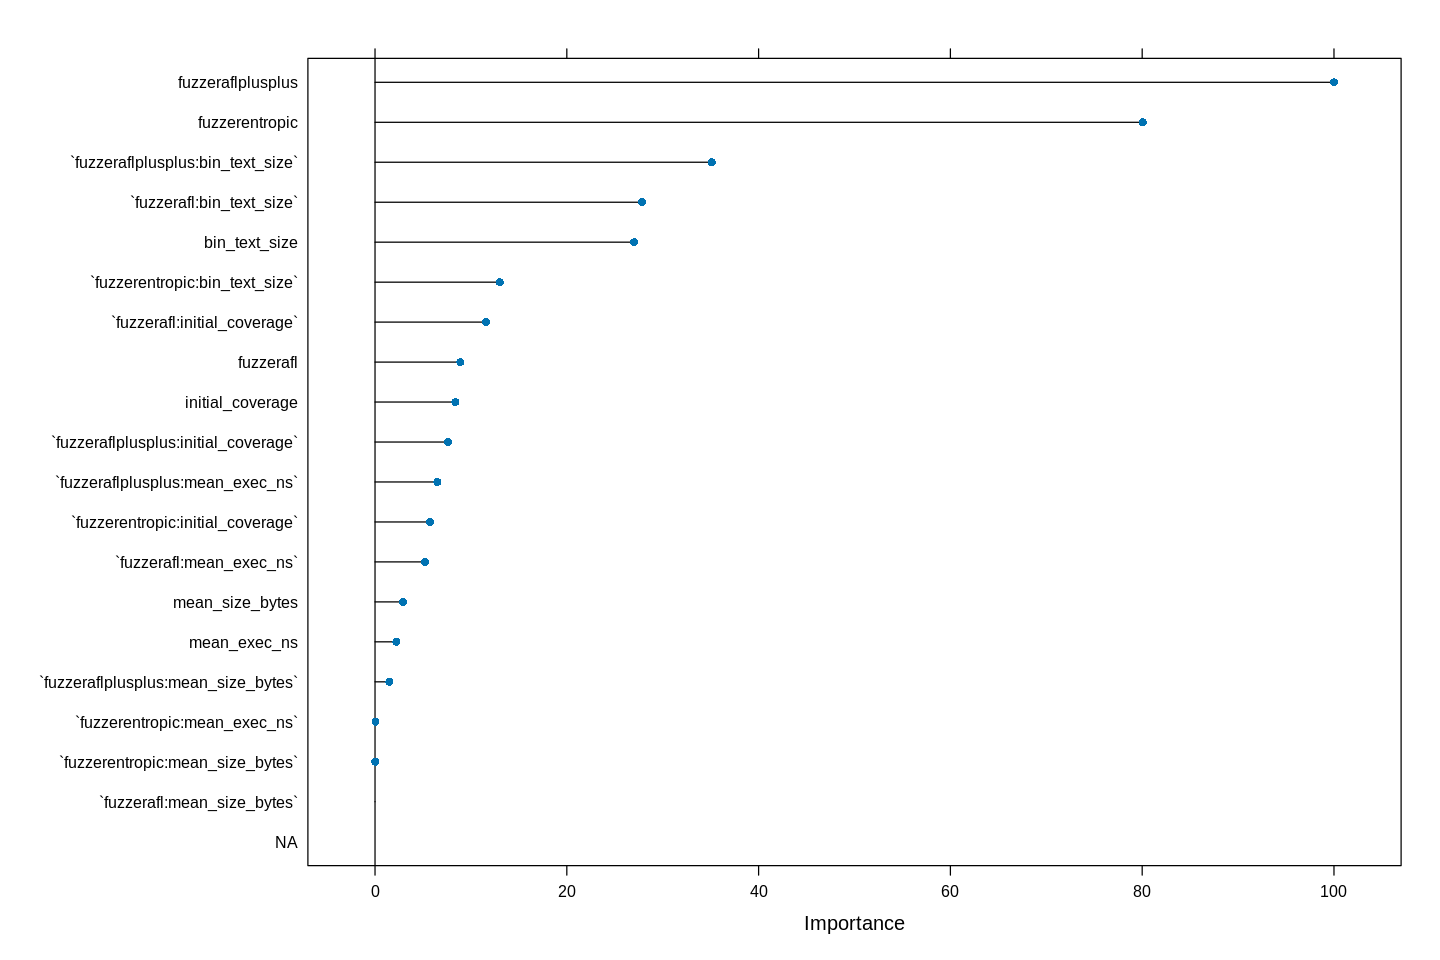

In [29]:
## Calculate Prediction Accuracy, R^2 etc.


library(caret)
library(glmnet)

s = dlm_corpus %>% ungroup() %>% select(-value,-group,-n) %>% pivot_wider(names_from=property, values_from = value_rank) %>% mutate(fuzzer = relevel(as.factor(fuzzer), ref = "libfuzzer"))
t = dlm_program %>% ungroup() %>% select(-value,-group,-n) %>% pivot_wider(names_from=property, values_from = value_rank) %>% mutate(fuzzer = relevel(as.factor(fuzzer), ref = "libfuzzer"))
s = s %>% left_join(t)
# head(s)

s <- within(s, fuzzer <- relevel(fuzzer, 1))
s$initial_coverage <- s$initial_coverage - mean(s$initial_coverage)
s$bin_text_size <- s$bin_text_size - mean(s$bin_text_size)
s$mean_exec_ns <- s$mean_exec_ns - mean(s$mean_exec_ns)
s$mean_size_bytes <- s$mean_size_bytes - mean(s$mean_size_bytes)

# s <- scaled_d

set.seed(1234)
idx = createDataPartition(s$fuzzer_rank, p = 0.75, times=1, list=FALSE)
trn = s[idx, ]
tst = s[-idx, ]

ctrl <- trainControl(method = "cv", number=5)
model <- train(fuzzer_rank ~  fuzzer * (mean_exec_ns + mean_size_bytes + initial_coverage + bin_text_size),
               data=trn,
               method="lm",
               trControl=ctrl,
               ) # importance=TRUE)


plot(varImp(model), 20)
summary(model)

trad_model <- train(fuzzer_rank ~  fuzzer,
    data=trn,
    method="lm",
    trControl=ctrl
)
summary(trad_model)

mfr <- trn %>% group_by(fuzzer) %>% select(fuzzer_rank) %>% summarize(mean = mean(fuzzer_rank))
mfr$rank <- rank(mfr$mean)
mfr$fuzzer <- as.factor(mfr$fuzzer)
    
dumb_ranker <- function(f) {
    mfr[mfr["fuzzer"] == as.character(f), "rank"]
}

dumb_pred <- function(f) {
    mfr[mfr["fuzzer"] == as.character(f), "mean"]
}

ptrn <- as.numeric(unlist(lapply(trn$fuzzer, dumb_pred)))
explained_naive <- sum((trn$fuzzer_rank - ptrn)^2)
print(explained_naive)
unexplained <- sum((trn$fuzzer_rank - mean(trn$fuzzer_rank))^2)
print(unexplained)
# data points - num estimates (including intercept)
# 1 dof for each dummy
dof_naive <- nrow(trn) - 3 - 1
print("dof")
print(dof_naive)
rsq_naive =  1 - explained_naive / unexplained
print("rsq_trad")
print(rsq_naive)
adj_rsq_naive = rsq_naive * (nrow(trn) - 1) / (nrow(trn) - 3 - 1)
print("adj_rsq_trad")
print(adj_rsq_naive)

p <- as.numeric(unlist(lapply(tst$fuzzer, dumb_ranker)))
print("trad:")
mean(tst$fuzzer_rank == p)
print("ours:")
mean(abs(tst$fuzzer_rank - predict(model, tst)) <= 0.5)
print("fuzzer only:")
mean(abs(tst$fuzzer_rank - predict(trad_model, tst)) <= 0.5)

# should clip the ranges in theory, but practically all predictions fall within (0.5, 4.5)
# predict(model, tst) < 0.5

# Lasso regression (glmnet) appears to not zero out our variables
# coef(model$finalModel, model$finalModel$lambdaOpt)

ERROR: Error in cor(xxx): 'x' must be numeric


In [129]:
## Do a wild bootstrap using the formula in the first line AND a model from a previous cell (e.g. from the cross val.)

reps = wild.boot(formula=(s$fuzzer_rank ~  s$fuzzer * (s$mean_exec_ns + s$mean_size_bytes + s$initial_coverage + s$bin_text_size)), B=2000)

i=1
coefficients = summary(model)$coefficients[,1]
for (name in names(coefficients)) {
  bca = quantile(reps$bootEstParam[,i], probs=c(.05, .95))
  Estimate = coefficients[[name]]
  s2 = data.frame(coefficient=name, estimate = Estimate, lower = bca[["5%"]], upper = bca[["95%"]])
  if (i == 1) {
    bootstrap2 = s2 
  } else {
    bootstrap2 = rbind(bootstrap2, s2)
  }
  #print(bca)
  i = i + 1
}
bootstrap2

write.csv(bootstrap2, "95_all_bootstrap_coeffs.csv", row.names=FALSE)

coefficient,estimate,lower,upper
<chr>,<dbl>,<dbl>,<dbl>
(Intercept),3.274389709,3.165197657,3.317060539
fuzzerafl,0.199012029,0.095212332,0.283898807
fuzzeraflplusplus,-1.821986673,-1.873319117,-1.674553517
fuzzerentropic,-1.438290747,-1.476366362,-1.282020001
mean_exec_ns,0.008375327,0.002249636,0.025180182
mean_size_bytes,0.009618947,-0.010320748,0.015426068
initial_coverage,0.019877878,0.007665991,0.033879686
bin_text_size,0.112530976,0.098723453,0.149253866
`fuzzerafl:mean_exec_ns`,-0.019801419,-0.031550649,-0.002585514


In [130]:
# Do the Holm-Bonferroni method to obtain adjusted alphas for each regression coefficient

bootstrap2 = bootstrap2 %>% dplyr::filter(!grepl("benchmark", coefficient))
bootstrap2 = bootstrap2 %>% dplyr::filter(!grepl("(Intercept)", coefficient))
bootstrap2
bootstrap2_ext <- data.frame(matrix(ncol = 5, nrow = 0))

for(i in 1:nrow(bootstrap2)) {
    row <- bootstrap2[i,]
    row2 <- bootstrap2[i,]
    if (row$lower > 0) {
        row2$dist <- row$lower - 0
    } else if (row$upper < 0) {
        row2$dist = 0 - row$upper
    } else {
        row2$dist <- -1 * max(abs(row$upper - 0), abs(row$lower - 0))
    }
    bootstrap2_ext[i,] <-row2
    # do stuff with row
}

colnames(bootstrap2_ext) <- colnames(bootstrap2)
colnames(bootstrap2_ext)[5] <- "dist"
bootstrap2_ext <- bootstrap2_ext[order(-bootstrap2_ext$dist), ]

my_bs <- function(model, alpha) {
  i=1
  coefficients = summary(model)$coefficients[,1]
  for (name in names(coefficients)) {
    bca = quantile(reps$bootEstParam[,i], probs=c(alpha, 1-alpha))
    Estimate = coefficients[[name]]
    str_lower = sub("(.[0-9])0+%", "\\1%", sprintf("%.2f%%", alpha*100))
    str_upper = sub("(.[0-9])0+%", "\\1%", sprintf("%.2f%%", (1-alpha)*100))
    str_lower = sub(".0+%", "%", str_lower)
    str_upper = sub(".0+%", "%", str_upper)
    s2 = data.frame(coefficient=name, estimate = Estimate, lower = bca[[str_lower]], upper = bca[[str_upper]])
    if (i == 1) {
      bootstrap_inner = s2 
    } else {
      bootstrap_inner = rbind(bootstrap_inner, s2)
    }
    #print(bca)
    i = i + 1
  }
  bootstrap_inner
}

new_bootstrap2 <- data.frame(matrix(ncol = 4, nrow = 0))
colnames(new_bootstrap2) <- colnames(bootstrap2)

total <- nrow(bootstrap2_ext)
for(i in 1:nrow(bootstrap2_ext)) {
    alpha <- round(0.05 / abs(total - i + 1), 4)
    row <- bootstrap2_ext[i,]
    new_bs <- my_bs(model, alpha)

    this_coeff <- bootstrap2_ext$coefficient[i]
    new_row <- new_bs %>% filter(coefficient == this_coeff)
    new_bootstrap2[i,] <- new_row
}

# Uncomment below to use Holm-Bonferoni Adjusted CI's
## NOTE -- Destructive change -- must re-run initial bootstrap after
new_bootstrap2$coefficient <- sub("`", "", sub("`", "", new_bootstrap2$coefficient))
bootstrap2 <- new_bootstrap2
coefficients = bootstrap2$coefficient

coefficient,estimate,lower,upper
<chr>,<dbl>,<dbl>,<dbl>
fuzzerafl,0.199012029,0.095212332,0.283898807
fuzzeraflplusplus,-1.821986673,-1.873319117,-1.674553517
fuzzerentropic,-1.438290747,-1.476366362,-1.282020001
mean_exec_ns,0.008375327,0.002249636,0.025180182
mean_size_bytes,0.009618947,-0.010320748,0.015426068
initial_coverage,0.019877878,0.007665991,0.033879686
bin_text_size,0.112530976,0.098723453,0.149253866
`fuzzerafl:mean_exec_ns`,-0.019801419,-0.031550649,-0.002585514
`fuzzeraflplusplus:mean_exec_ns`,-0.023063082,-0.042736998,-0.013021717


,coefficient,estimate,lower,upper
,<chr>,<dbl>,<dbl>,<dbl>
1,fuzzeraflplusplus,-1.8219867,-1.94783383,-1.6050740
2,fuzzerentropic,-1.4382907,-1.54627512,-1.2184219
3,fuzzeraflplusplus:bin_text_size,-0.2080224,-0.27433636,-0.1701051
4,fuzzerafl:bin_text_size,-0.1677412,-0.23008138,-0.1304387
5,bin_text_size,0.1125310,0.08480518,0.1633987
6,fuzzerafl,0.1990120,0.03565714,0.3538307


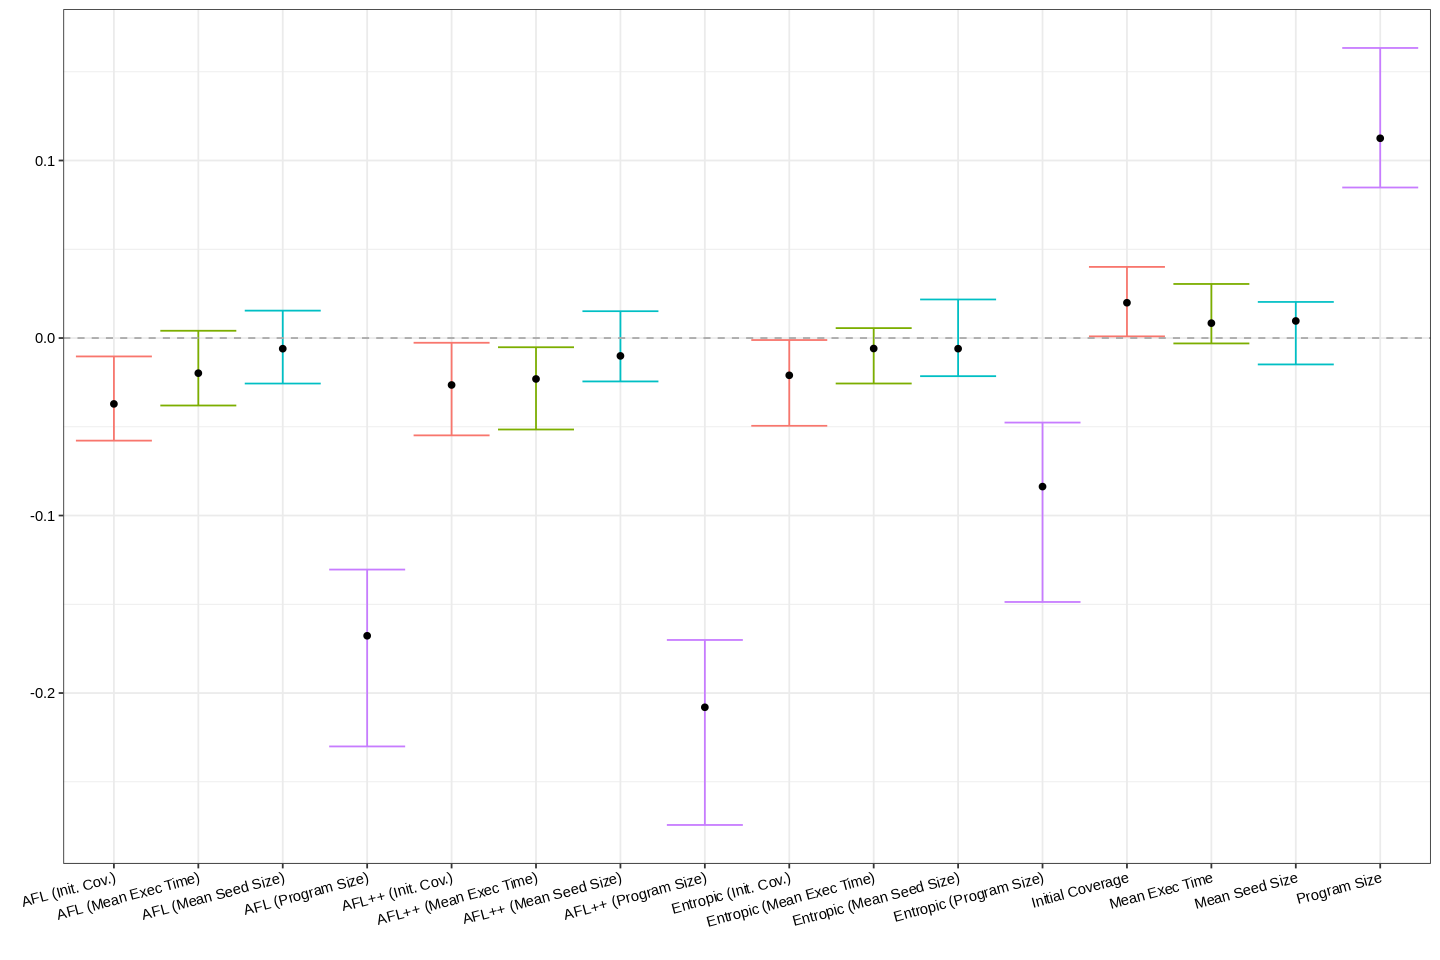

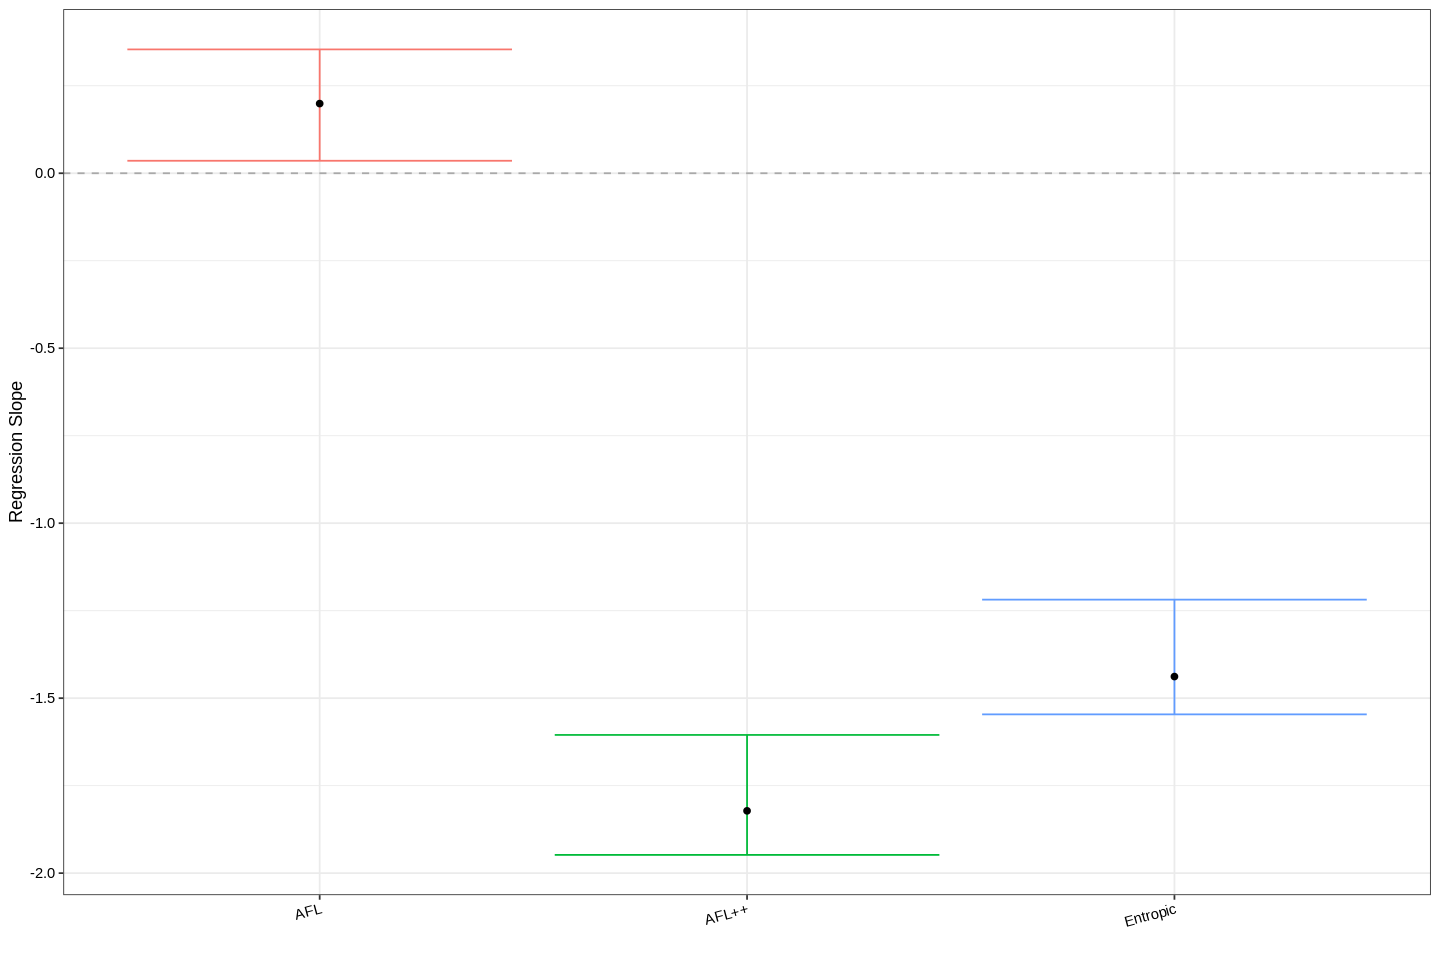

In [131]:
options(repr.plot.width=12, repr.plot.height=8)
library(stringr)
recode_coefficients = function(coefficient) {
  return(
    ifelse(coefficient == "fuzzerafl", "AFL",
    ifelse(coefficient == "fuzzerentropic", "Entropic",
    ifelse(coefficient == "fuzzerlibfuzzer", "LibFuzzer",
    ifelse(coefficient == "fuzzeraflplusplus", "AFL++",
    ifelse(coefficient == "mean_size_bytes",  "Mean Seed Size",
    ifelse(coefficient == "mean_exec_ns", "Mean Exec Time",
    ifelse(coefficient == "bin_text_size", "Program Size",
    ifelse(coefficient == "initial_coverage", "Initial Coverage",
    ifelse(coefficient == "fuzzerafl:initial_coverage", "AFL (Init. Cov.)",
    ifelse(coefficient == "fuzzerafl:mean_size_bytes", "AFL (Mean Seed Size)",
    ifelse(coefficient == "fuzzerafl:mean_exec_ns", "AFL (Mean Exec Time)",
    ifelse(coefficient == "fuzzerafl:bin_text_size", "AFL (Program Size)",
    ifelse(coefficient == "fuzzerlibfuzzer:initial_coverage", "LibFuzzer (Init. Cov.)",
    ifelse(coefficient == "fuzzerlibfuzzer:mean_size_bytes", "LibFuzzer (Mean Seed Size)",
    ifelse(coefficient == "fuzzerlibfuzzer:mean_exec_ns", "LibFuzzer (Mean Exec Time)",
    ifelse(coefficient == "fuzzerlibfuzzer:bin_text_size", "LibFuzzer (Program Size)",
    ifelse(coefficient == "fuzzerentropic:initial_coverage", "Entropic (Init. Cov.)",
    ifelse(coefficient == "fuzzerentropic:mean_size_bytes", "Entropic (Mean Seed Size)",
    ifelse(coefficient == "fuzzerentropic:mean_exec_ns", "Entropic (Mean Exec Time)",
    ifelse(coefficient == "fuzzerentropic:bin_text_size", "Entropic (Program Size)",
    ifelse(coefficient == "fuzzeraflplusplus:initial_coverage", "AFL++ (Init. Cov.)",
    ifelse(coefficient == "fuzzeraflplusplus:mean_size_bytes", "AFL++ (Mean Seed Size)",
    ifelse(coefficient == "fuzzeraflplusplus:mean_exec_ns", "AFL++ (Mean Exec Time)",
    ifelse(coefficient == "fuzzeraflplusplus:bin_text_size", "AFL++ (Program Size)",
    coefficient)))))))))))))))))))))))))
}

color_coefficients = function(coefficient) {
  return(
    ifelse(coefficient == "mean_size_bytes",  "Mean Seed Size",
    ifelse(coefficient == "mean_exec_ns", "Mean Exec Time",
    ifelse(coefficient == "initial_coverage", "Initial Coverage",
    ifelse(coefficient == "bin_text_size", "Program Size",
    ifelse(coefficient == "fuzzerafl:initial_coverage", "Initial Coverage",
    ifelse(coefficient == "fuzzerafl:mean_size_bytes", "Mean Seed Size",
    ifelse(coefficient == "fuzzerafl:mean_exec_ns", "Mean Exec Time",
    ifelse(coefficient == "fuzzerafl:bin_text_size", "Program Size",
    ifelse(coefficient == "fuzzerlibfuzzer:initial_coverage", "Initial Coverage",
    ifelse(coefficient == "fuzzerlibfuzzer:mean_size_bytes", "Mean Seed Size",
    ifelse(coefficient == "fuzzerlibfuzzer:mean_exec_ns", "Mean Exec Time",
    ifelse(coefficient == "fuzzerlibfuzzer:bin_text_size", "Program Size",
    ifelse(coefficient == "fuzzerentropic:initial_coverage", "Initial Coverage",
    ifelse(coefficient == "fuzzerentropic:mean_size_bytes", "Mean Seed Size",
    ifelse(coefficient == "fuzzerentropic:mean_exec_ns", "Mean Exec Time",
    ifelse(coefficient == "fuzzerentropic:bin_text_size", "Program Size",
    ifelse(coefficient == "fuzzeraflplusplus:initial_coverage", "Initial Coverage",
    ifelse(coefficient == "fuzzeraflplusplus:mean_size_bytes", "Mean Seed Size",
    ifelse(coefficient == "fuzzeraflplusplus:mean_exec_ns", "Mean Exec Time",
    ifelse(coefficient == "fuzzeraflplusplus:bin_text_size", "Program Size",
    coefficient))))))))))))))))))))
  )
}

bootstrap2 = bootstrap2 %>% dplyr::filter(!grepl("benchmark", coefficient))
head(bootstrap2)

ggplot(bootstrap2 %>% filter(!coefficient %in% c("(Intercept)",paste0("fuzzer",unique(dlm_corpus$fuzzer)))) %>%
mutate(colors = color_coefficients(coefficient), coefficient = recode_coefficients(coefficient))) + 
  geom_errorbar(aes(x = coefficient, ymin = lower, ymax = upper, color = colors)) +
  geom_point(aes(coefficient, estimate)) +
  geom_hline(yintercept=0, color = "darkgrey", linetype="dashed") +
  ylab("") +
  xlab("") +
  # scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07","#7246b4")) +
  #facet_wrap(~property) +
  theme(legend.position = "none", axis.text.x = element_text(angle = 15, vjust = 1, hjust=1, color = "black"), axis.text.y = element_text(color = "black"))
ggsave("~/Downloads/mlr.corpus.properties.pdf", scale=0.8,  width=12, height=4)

ggplot(bootstrap2 %>% filter(coefficient %in% paste0("fuzzer",unique(dlm_corpus$fuzzer))) %>% mutate(coefficient = recode_coefficients(coefficient))) + 
  geom_errorbar(aes(x = coefficient, ymin = lower, ymax = upper, color = coefficient)) +
  geom_point(aes(coefficient, estimate)) +
  geom_hline(yintercept=0, color = "darkgrey", linetype="dashed") +
  ylab("Regression Slope") +
  xlab("") +
  #facet_wrap(~property) 
  theme(legend.position = "none", axis.text.x = element_text(angle = 15, vjust = 1, hjust=1, color = "black"), axis.text.y = element_text(color = "black"))
ggsave("~/Downloads/mlr.corpus.fuzzer.pdf", scale=0.8, width = 3, height=4)

In [120]:
# Residual plot to check heteroscedasicity
library(ggfortify)
pdf(file = "~/Downloads/autoplot.pdf",width=6,height=4)
autoplot(model)#,which = 1:4, ncol = 2)
dev.off()

#ggsave("~/Downloads/autoplot.pdf")

res <- resid(model)
ggplot(data.frame(fitted = fitted(model),residuals = resid(model)), aes(fitted,residuals)) + 
  geom_point() + 
  geom_hline(yintercept = 0) +
  xlab("Predicted Value") +
  ylab("Residuals") +
  theme(axis.text.x = element_text(color = "black"), axis.text.y = element_text(color = "black"))
ggsave("~/Downloads/residuals.pdf",scale=0.5)

ggplot(data.frame(residuals = res), aes(sample=residuals))+stat_qq()+stat_qq_line() +
  xlab("Theoretical Quantiles") + 
  ylab("Observed Quantiles") +
  theme(axis.text.x = element_text(color = "black"), axis.text.y = element_text(color = "black"))
ggsave("~/Downloads/qqplot.pdf",scale=0.5)

shapiro.test(res)
length(res)

ERROR: [1m[33mError[39m in `autoplot()`:[22m
[1m[22m[33m![39m Objects of class [34m<train>[39m are not supported by autoplot.
[36mℹ[39m have you loaded the required package?


In [ ]:
library(MASS)
library(generalhoslem)

s = dlm_corpus %>% ungroup() %>% dplyr::select(-value,-group) %>% pivot_wider(names_from=property, values_from = value_rank) %>% mutate(fuzzer = relevel(as.factor(fuzzer), ref = "libfuzzer"), fuzzer_rank = as.factor(fuzzer_rank))
model = polr(data = s, formula = fuzzer_rank ~ fuzzer * (initial_coverage + mean_exec_ns + mean_size_bytes))
summary(model)

  # Lipsitz goodness of fit test for ordinal response models: https://peopleanalytics-regression-book.org/ord-reg.html#model-diagnostics
  lipsitz = lipsitz.test(model)$p.value
  pulkrob = pulkrob.chisq(model, catvars = c("fuzzer"))$p.value
  hosmer = logitgof(s$fuzzer_rank, fitted(model),ord=TRUE)$p.value
  
  # Model parsimony: https://www.statisticshowto.com/akaikes-information-criterion/
  AIC = model$deviance + 2 * model$edf

  coefficients = summary(model)$coefficients
  p_value =  (1 - pnorm(abs(coefficients[ ,"t value"]), 0, 1)) * 2
  (coefficients = cbind(coefficients, p_value))
  odds_ratio = exp(coefficients[ , "Value"])
  coefficients = cbind(coefficients[ , c("Value", "p_value")], odds_ratio)
  
  print(paste0("AIC: ",  format(round(AIC, 2), nsmall = 2), ", Lipsitz: ", format(round(lipsitz, 2), nsmall = 2),", Pulkstenis-Robinson: ", ifelse(pulkrob < 0.05, "<0.05", format(round(pulkrob, 2), nsmall = 2)), ", Hosmer and Lemeshow test: ", ifelse(hosmer < 0.05, "<0.05", format(round(hosmer, 2), nsmall = 2))))
  print(coefficients)
  
  

detach("package:generalhoslem", unload = TRUE)
detach("package:MASS", unload = TRUE)

In [ ]:
print(paste0("AIC: ",  format(round(AIC, 2), nsmall = 2), ", Lipsitz: ", format(round(lipsitz, 2), nsmall = 2),", Pulkstenis-Robinson: ", ifelse(pulkrob < 0.05, "< 0.05", format(round(pulkrob, 2), nsmall = 2)), ", Hosmer and Lemeshow test: ", ifelse(hosmer < 0.05, "< 0.05", format(round(hosmer, 2), nsmall = 2))))

In [ ]:
ggplot(d1, aes(value,coverage_incease)) + 
  geom_point(color="grey") + 
  geom_point(data=d1 %>% group_by(benchmark, property, value) %>% summarize_all(mean), aes(value, coverage_increase)) +
  facet_grid(fuzzer ~ property, scales="free")

In [ ]:
ggplot(d1 %>% select(-benchmark, -per_target_trial) %>% group_by(fuzzer, property, value) %>% summarize_all(mean), 
       aes(value, coverage_incease)) + geom_point() + facet_grid(fuzzer ~ property)

In [ ]:
library(MASS)
library(generalhoslem)
Fuzzer = "aflplusplus"  
a = rbind(dlm_corpus,dlm_program) %>%
    filter(fuzzer == Fuzzer) %>% 
    dplyr::select(-n, -value, -group) %>% 
    pivot_wider(names_from = property, values_from = value_rank) %>% 
    mutate(fuzzer_rank = as.factor(fuzzer_rank))
head(a)
rbind(dlm_corpus,dlm_program) %>%
    filter(fuzzer == Fuzzer) %>% 
    dplyr::select(-n, -value, -group)

model = polr(a, formula = fuzzer_rank ~ (initial_coverage) +  (mean_exec_ns) )
print(model)
print(summary(model))
generalhoslem::lipsitz.test(model)

In [ ]:
library(MASS)
library(generalhoslem)

print("Properties")
print(unique(dlm_corpus$property))

for (Fuzzer in levels(factor(dlm_corpus$fuzzer))) {
  a = rbind(dlm_corpus,dlm_program) %>%
    filter(fuzzer == Fuzzer) %>% 
    ungroup() %>%
    dplyr::select(-n, -value, -group) %>% 
    pivot_wider(names_from = property, values_from = value_rank) %>% 
    mutate(fuzzer_rank = as.factor(fuzzer_rank))

  model = polr(a, formula = fuzzer_rank ~ (initial_coverage) +  (mean_exec_ns))# + (bin_text_size))

  # Lipsitz goodness of fit test for ordinal response models: https://peopleanalytics-regression-book.org/ord-reg.html#model-diagnostics
  lipsitz = lipsitz.test(model)$p.value
  pulkrob = "N/A" #format(round(pulkrob.chisq(model, catvars = c("mean_exec_ns","bin_text_size","initial_coverage"))$p.value, 2), nsmall = 2))

  # Model parsimony: https://www.statisticshowto.com/akaikes-information-criterion/
  AIC = model$deviance + 2 * model$edf

  coefficients = summary(model)$coefficients
  p_value =  (1 - pnorm(abs(coefficients[ ,"t value"]), 0, 1)) * 2
  (coefficients = cbind(coefficients, p_value))
  odds_ratio = exp(coefficients[ , "Value"])
  coefficients = cbind(coefficients[ , c("Value", "p_value")], odds_ratio)
  print(Fuzzer)
  print(paste0("AIC: ",  format(round(AIC, 2), nsmall = 2), ", Lipsitz: ", format(round(lipsitz, 2), nsmall = 2),", Pulkstenis-Robinson: ", pulkrob))
  print(coefficients)
  print("-----")
  print(coefficients[1,])

  tli.table = xtable(head(coefficients, n=2), type = "latex")
  align(tli.table) <- c("@{}r","@{ }r","@{ }r","@{ }r@{}")
  print(tli.table, floating = FALSE, file = paste0("~/Downloads/polr.corpus.",Fuzzer,".tex"))
  write(paste0("AIC: ",  format(round(AIC, 2), nsmall = 2), ", Lipsitz: ", format(round(lipsitz, 2), nsmall = 2), ", Pulkstenis-Robinson: ", pulkrob, file = paste0("~/Downloads/polr.corpus.", Fuzzer,".tex"), append=TRUE))
}

detach("package:generalhoslem", unload = TRUE)
detach("package:MASS", unload = TRUE)


In [ ]:
detach("package:generalhoslem", unload = TRUE)
detach("package:MASS", unload = TRUE)

In [ ]:
library(MASS)
library(generalhoslem)

print("Properties")
print(unique(dlm_program$property))

for (Fuzzer in levels(factor(dlm_program$fuzzer))) {
  a = rbind(dlm_corpus,dlm_program) %>%
    filter(fuzzer == Fuzzer) %>% 
    ungroup() %>%
    dplyr::select(-n, -value, -group) %>% 
    pivot_wider(names_from = property, values_from = value_rank) %>% 
    mutate(fuzzer_rank = as.factor(fuzzer_rank))

  model = polr(a, formula = fuzzer_rank ~ (bin_text_size))

  # Lipsitz goodness of fit test for ordinal response models: https://peopleanalytics-regression-book.org/ord-reg.html#model-diagnostics
  lipsitz = lipsitz.test(model)$p.value
  pulkrob = "N/A" #format(round(pulkrob.chisq(model, catvars = c("mean_exec_ns","bin_text_size","initial_coverage"))$p.value, 2), nsmall = 2))

  # Model parsimony: https://www.statisticshowto.com/akaikes-information-criterion/
  AIC = model$deviance + 2 * model$edf

  coefficients = summary(model)$coefficients
  p_value =  (1 - pnorm(abs(coefficients[ ,"t value"]), 0, 1)) * 2
  (coefficients = cbind(coefficients, p_value))
  odds_ratio = exp(coefficients[ , "Value"])
  coefficients = cbind(coefficients[ , c("Value", "p_value")], odds_ratio)
  print(Fuzzer)
  print(paste0("AIC: ",  format(round(AIC, 2), nsmall = 2), ", Lipsitz: ", format(round(lipsitz, 2), nsmall = 2),", Pulkstenis-Robinson: ", pulkrob))
  print(coefficients)

  tli.table = xtable(head(coefficients, n=2), type = "latex")
  align(tli.table) <- c("@{}r","@{ }r","@{ }r","@{ }r@{}")
  print(tli.table, floating = FALSE, file = paste0("~/Downloads/polr.corpus.",Fuzzer,".tex"))
  write(paste0("AIC: ",  format(round(AIC, 2), nsmall = 2), ", Lipsitz: ", format(round(lipsitz, 2), nsmall = 2), ", Pulkstenis-Robinson: ", pulkrob, file = paste0("~/Downloads/polr.corpus.", Fuzzer,".tex"), append=TRUE))
}

detach("package:generalhoslem", unload = TRUE)
detach("package:MASS", unload = TRUE)

In [132]:
e1 = read.csv("e1-comb-data.csv") 

colnames(e1)
unique(e1$fuzzer)
unique(e1$benchmark)

print("Any bugs?")
e1 %>% filter(bugs_covered > 0)

e1 = e1 %>% select(-bugs_covered)

print("Time")
summary(e1$time)

# We notice that not there are not all trials available for the 84600 time stamp
t  = e1 %>% filter(time == 86400) %>% group_by(benchmark,fuzzer,corpus) %>% summarize(n=n())
t
print("Mean number of trials.")
mean(t$n)

# So we remove zlib_zlib_uncompress_fuzzer (and honggfuzz for consistency)
t = t %>% filter(fuzzer != "honggfuzz" & benchmark != "zlib_zlib_uncompress_fuzzer")
print("Mean number of trials after removing honggfuzz.")
mean(t$n)

e1 = e1 %>% filter(time == 86400 & fuzzer != "honggfuzz"  & benchmark != "zlib_zlib_uncompress_fuzzer") %>% select(-time)

[1] "X"                    "trial_id"             "benchmark"           
 [4] "fuzzer"               "Unnamed..0_x"         "Unnamed..0.1"        
 [7] "git_hash"             "experiment_filestore" "experiment"          
[10] "time_started"         "time_ended"           "time"                
[13] "edges_covered"        "fuzzer_stats"         "crash_key"           
[16] "bugs_covered"         "edges_covered_max"    "saturated"           
[19] "time_sat"             "initial_coverage"     "corpus"              
[22] "fuzzbench_trial_id"   "per_target_trial"     "Unnamed..0_y"        
[25] "total_shared"         "total_eq"             "total_ineq"          
[28] "total_indir"          "bin_text_size"        "eq_unexplored"       
[31] "eq_reached"           "ineq_unexplored"      "ineq_reached"        
[34] "indir_reached"        "shared_reached"       "mean_exec_ns"        
[37] "q25_exec_ns"          "q50_exec_ns"          "q75_exec_ns"         
[40] "q100_exec_ns"         "mean_size_bytes"      "q25_mean_size_bytes" 
[43] "q50_mean_size_bytes"  "q75_mean_size_bytes"  "q100_mean_size_bytes"
[46] "corpus_size"

[1] "afl"         "libfuzzer"   "aflplusplus" "entropic"    "honggfuzz"

[1] "lcms-2017-03-21"             "sqlite3_ossfuzz"            
[3] "zlib_zlib_uncompress_fuzzer"

[1] "Any bugs?"


Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


X,trial_id,benchmark,fuzzer,Unnamed..0_x,Unnamed..0.1,git_hash,experiment_filestore,experiment,time_started,⋯,q25_exec_ns,q50_exec_ns,q75_exec_ns,q100_exec_ns,mean_size_bytes,q25_mean_size_bytes,q50_mean_size_bytes,q75_mean_size_bytes,q100_mean_size_bytes,corpus_size
<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


[1] "Time"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  48600   86400   86400   85608   86400   86400 

`summarise()` has grouped output by 'benchmark', 'fuzzer'. You can override using the `.groups` argument.


benchmark,fuzzer,corpus,n
<chr>,<chr>,<chr>,<int>
lcms-2017-03-21,afl,e1v0-afl,25
lcms-2017-03-21,afl,e1v0-libfuzzer,25
lcms-2017-03-21,aflplusplus,e1v0-afl,25
lcms-2017-03-21,aflplusplus,e1v0-libfuzzer,25
lcms-2017-03-21,entropic,e1v0-afl,25
lcms-2017-03-21,entropic,e1v0-libfuzzer,25
lcms-2017-03-21,honggfuzz,e1v0-afl,25
lcms-2017-03-21,honggfuzz,e1v0-libfuzzer,25
lcms-2017-03-21,libfuzzer,e1v0-afl,25


[1] "Mean number of trials."


[1] 24.4

[1] "Mean number of trials after removing honggfuzz."


[1] 25

## Ranking, plus Vargha Delaney A12 and Mann-Whitney U for a LibFuzzer-seeded campaign like in Fuzzbench.

In [139]:

library(effsize)
defaultW <- getOption("warn")
options(warn = -1)



rn = function(fuzzer) {
  if (fuzzer == "aflplusplus") { return("\\emph{AFL++}")}
  if (fuzzer == "afl")         { return("\\emph{AFL}")  }
  if (fuzzer == "libfuzzer")    { return("\\emph{LF}")   }
  if (fuzzer == "entropic")     { return("\\emph{EnLF}") }
}


for (Benchmark in unique(e1$benchmark)) {

  for (Corpus in unique(e1$corpus)) {
    table = ""
    for (Fuzzer in levels(factor(e1$fuzzer))) {
      table = paste0(table, " & ", rn(Fuzzer))
    }
    table = paste0(table, "\\\\\n")

    for (Fuzzer1 in levels(factor(e1$fuzzer))) {
      table = paste0(table, rn(Fuzzer1), " & ")
      for (Fuzzer2 in levels(factor(e1$fuzzer))) {
        if (Fuzzer1 == Fuzzer2) {
          table = paste0(table, " & ")
          next
        }
        specific1 = e1 %>% filter(fuzzer == Fuzzer1,
                                  benchmark == Benchmark, corpus == Corpus)
        specific2 = e1 %>% filter(fuzzer == Fuzzer2,
                                  benchmark == Benchmark, corpus == Corpus)
        VDA = VD.A(specific1$edges_covered, specific2$edges_covered)$estimate
        U = wilcox.test(specific2$edges_covered,
                        specific1$edges_covered,
                        paired=FALSE)$p.value
        if (U < 0.05/6) {
          table = paste0(table, "\\textbf{")
        } else {
          print(U)
          print(Fuzzer1)
          print(Fuzzer2)
        }
        table = paste0(table, format(round(VDA, 2), nsmall = 2))
        if (U < 0.05/6) {
          table = paste0(table, "}")
        }
        table = paste0(table, " & ")
      }
      table = substr(table, 1, nchar(table) - 2)
      table = paste0(table, "\\\\\n")
    }
    table = substr(table, 1, nchar(table) - 3)

    cat(table, file=paste0("~/Downloads/", Benchmark, ".", Corpus, ".txt"))

    cat(paste0("\n\n", Benchmark, " (", Corpus, "):\n"))
    cat(table)
  }

}
options(warn = defaultW)


# difference in ranking AFL-seeded campaign

# measure effect size and statistical significance of the difference in performance of the same fuzzers started on different seed origins.

[1] 0.228963
[1] "aflplusplus"
[1] "entropic"
[1] 0.2404348
[1] "aflplusplus"
[1] "libfuzzer"
[1] 0.228963
[1] "entropic"
[1] "aflplusplus"
[1] 0.2404348
[1] "libfuzzer"
[1] "aflplusplus"


lcms-2017-03-21 (e1v0-afl):
 & \emph{AFL} & \emph{AFL++} & \emph{EnLF} & \emph{LF}\\
\emph{AFL} &  & \textbf{0.11} & \textbf{0.00} & \textbf{0.00} \\
\emph{AFL++} & \textbf{0.89} &  & 0.40 & 0.60 \\
\emph{EnLF} & \textbf{1.00} & 0.60 &  & \textbf{0.77} \\
\emph{LF} & \textbf{1.00} & 0.40 & \textbf{0.23} &  [1] 0.2858548
[1] "afl"
[1] "entropic"
[1] 0.04357682
[1] "aflplusplus"
[1] "entropic"
[1] 0.2858548
[1] "entropic"
[1] "afl"
[1] 0.04357682
[1] "entropic"
[1] "aflplusplus"


lcms-2017-03-21 (e1v0-libfuzzer):
 & \emph{AFL} & \emph{AFL++} & \emph{EnLF} & \emph{LF}\\
\emph{AFL} &  & \textbf{0.27} & 0.41 & \textbf{0.85} \\
\emph{AFL++} & \textbf{0.73} &  & 0.67 & \textbf{0.94} \\
\emph{EnLF} & 0.59 & 0.33 &  & \textbf{0.94} \\
\emph{LF} & \textbf{0.15} & \textbf{0.06} & \textbf{0.06} &  [1] 0.815885

## Difference in ranking AFL-seeded campaign

In [135]:
t = e1 %>% 
  group_by(benchmark, fuzzer, corpus) %>% 
  summarize(cov = mean(edges_covered)) %>%
  group_by(benchmark, corpus) %>%
  mutate(rank = rank(-cov))
t %>% filter(benchmark == "lcms-2017-03-21", corpus == "e1v0-afl")
t %>% filter(benchmark == "lcms-2017-03-21", corpus == "e1v0-libfuzzer")

`summarise()` has grouped output by 'benchmark', 'fuzzer'. You can override using the `.groups` argument.


benchmark,fuzzer,corpus,cov,rank
<chr>,<chr>,<chr>,<dbl>,<dbl>
lcms-2017-03-21,afl,e1v0-afl,1317.48,4
lcms-2017-03-21,aflplusplus,e1v0-afl,1774.68,3
lcms-2017-03-21,entropic,e1v0-afl,1902.92,1
lcms-2017-03-21,libfuzzer,e1v0-afl,1804.16,2


benchmark,fuzzer,corpus,cov,rank
<chr>,<chr>,<chr>,<dbl>,<dbl>
lcms-2017-03-21,afl,e1v0-libfuzzer,1972.16,3
lcms-2017-03-21,aflplusplus,e1v0-libfuzzer,2031.08,1
lcms-2017-03-21,entropic,e1v0-libfuzzer,2007.48,2
lcms-2017-03-21,libfuzzer,e1v0-libfuzzer,1900.60,4


## Measure effect size and statistical significance of the difference in performance of the same fuzzers started on different seed origins.

In [137]:
t = e1 %>%
  select(benchmark, fuzzer, edges_covered, corpus, per_target_trial) %>% 
  mutate( # Recode
      corpus = recode(corpus, 'e1v0-afl'="aflgen", 'e1v0-libfuzzer'="lfgen"),
      corpus = as.factor(corpus)
  ) %>%
  pivot_wider(names_from = corpus, values_from = edges_covered) %>%
  #recode_factor(aflgen="e1v0-afl", lfgen="e1v0-libfuzzer") %>%
  group_by(benchmark, fuzzer) %>%
  summarize(
    VDA = VD.A(aflgen, lfgen)$estimate,
    U = wilcox.test(lfgen, aflgen, paired=FALSE)$p.value
  )
t

table = ""
for (Fuzzer in levels(factor(t$fuzzer))) {
  table = paste0(table, " & ", rn(Fuzzer))
}
table = paste0(table, "\\\\\\hline\n")

# VDA
table = paste0(table, "\\textbf{Effect Size} ($\\hat A_{12}$) &")
for (Fuzzer in levels(factor(t$fuzzer))) {
  s = t %>% filter(benchmark=="lcms-2017-03-21", fuzzer == Fuzzer)
  if (s$U < 0.05/4) {
    table = paste0(table, "\\textbf{")
  }
  table = paste0(table, format(round(s$VDA, 4), nsmall = 4), " & ")
  if (s$U < 0.05/4) {
    table = paste0(table, "}")
  }
  
}
table = substr(table, 1, nchar(table) - 2)
table = paste0(table, "\\\\\n")

# U
table = paste0(table, "\\textbf{Statist. Sign.} ($U$) &")
for (Fuzzer in levels(factor(t$fuzzer))) {
  s = t %>% filter(benchmark=="lcms-2017-03-21", fuzzer == Fuzzer)
  table = paste0(table, format(s$U, scientific=TRUE, digits=2), " & ")
}
table = substr(table, 1, nchar(table) - 2)
table = paste0(table, "%")
#table = paste0(table, "\\\\\n")

cat(table, file="~/Downloads/lcms-2017-03-21.effect.txt")
cat(table)


Warning message:
“There were 5 warnings in `summarize()`.
The first warning was:
ℹ In argument: `U = wilcox.test(lfgen, aflgen, paired = FALSE)$p.value`.
ℹ In group 1: `benchmark = "lcms-2017-03-21"`, `fuzzer = "afl"`.
Caused by warning in `wilcox.test.default()`:
! cannot compute exact p-value with ties
ℹ Run `dplyr::last_dplyr_warnings()` to see the 4 remaining warnings.”
`summarise()` has grouped output by 'benchmark'. You can override using the `.groups` argument.


benchmark,fuzzer,VDA,U
<chr>,<chr>,<dbl>,<dbl>
lcms-2017-03-21,afl,0.04289941,2.277703e-09
lcms-2017-03-21,aflplusplus,0.08000000,3.697375e-07
lcms-2017-03-21,entropic,0.14640000,1.880416e-05
lcms-2017-03-21,libfuzzer,0.18000000,1.080766e-04
sqlite3_ossfuzz,afl,0.79200000,4.133607e-04
sqlite3_ossfuzz,aflplusplus,0.59520000,2.547760e-01
sqlite3_ossfuzz,entropic,0.57760000,3.548285e-01
sqlite3_ossfuzz,libfuzzer,0.69440000,1.794217e-02


 & \emph{AFL} & \emph{AFL++} & \emph{EnLF} & \emph{LF}\\\hline
\textbf{Effect Size} ($\hat A_{12}$) &\textbf{0.0429 & }\textbf{0.0800 & }\textbf{0.1464 & }\textbf{0.1800 &\\
\textbf{Statist. Sign.} ($U$) &2.3e-09 & 3.7e-07 & 1.9e-05 & 1.1e-04 %

In [ ]:
a <- dlm_corpus %>% 
  group_by(fuzzer, property, value_rank) %>%
  summarize(fuzzer_rank = mean(fuzzer_rank))
head(a)

In [ ]:
require(ggstance)
require(ggplot2)
require(ggpubr)
ggscatter(a, x="value_rank", y="fuzzer_rank") +
          geom_smooth(aes(color=fuzzer),method="lm") +
          facet_wrap(. ~ property, scales="free")

In [ ]:
frrr_f <- data.frame()
for (p in unique(a$property)) {
        q <- a %>% filter(property == p)
        for (f in unique(a$fuzzer)) {
                z <- q %>% filter(fuzzer == f)
                model <- lm(fuzzer_rank ~ value_rank, z)
                vr <- (model$coefficients["value_rank"])
                rsq <- (summary(model)$r.squared)
                ci <- confint(model)
                frrr_f <- rbind(frrr_f, c(f, p, vr, rsq, ci[1], ci[2]))
        }
}
names(frrr_f) <- list("model", "term", "estimate", "rsq", "conf.low", "conf.high")
frrr_f


In [ ]:
vrrr_f <- data.frame()
vrrr <- data.frame()
for (p in unique(dlm_corpus$property)) {
        q <- dlm_corpus %>% filter(property == p)
        model <- lm(coverage_inc_rank ~ value_rank, q)
        vr <- (model$coefficients["value_rank"])
        rsq <- (summary(model)$r.squared)
        ci <- confint(model)
        vrrr <- rbind(vrrr, c(p, vr, rsq, ci[1], ci[2]))
        for (f in unique(a$fuzzer)) {
                z <- q %>% filter(fuzzer == f)
                model <- lm(coverage_inc ~ value_rank, z)
                vr <- (model$coefficients["value_rank"])
                rsq <- (summary(model)$r.squared)
                ci <- confint(model)

                vrrr_f <- rbind(vrrr_f, c(f, p, vr, rsq, ci[1], ci[2]))
        }
}
names(vrrr) <- list("term", "estimate", "rsq", "conf.low", "conf.high")
names(vrrr_f) <- list("model", "term", "estimate", "rsq", "conf.low", "conf.high")

In [ ]:
frrmr <- data.frame()
wide_dlm_corp <- (dlm_corpus %>% pivot_wider(id_cols = c("per_target_trial", "benchmark", "fuzzer", "fuzzer_rank"), names_from="property", values_from="value_rank"))
for (f in unique(a$fuzzer)) {
    q <- wide_dlm_corp %>% filter(fuzzer == f)

    model <- lm(fuzzer_rank ~  initial_coverage + mean_exec_ns + mean_size_bytes, q)
    s <- data.frame(summary(model)$coefficients)
    s$fuzzer = f
    s$rsq = summary(model)$r.squared
    ci <- confint(model)
    s$conf.low <- ci[1]
    s$conf.high <- ci[2]
    frrmr <- rbind(frrmr, s)
}
frrmr